In [ ]:
import pandas as pd
from IPython.display import display

# Ruta al archivo de Excel
file_path = r'C:\Users\USUARIO\Desktop\nuevo\bd128.xlsx'

# Intentar cargar el archivo de Excel en un DataFrame
try:
    Data1 = pd.read_excel(file_path, sheet_name=0)  
    display(Data1.head())
except FileNotFoundError:
    print("Error: El archivo no se encuentra en la ruta especificada.")
except ValueError as e:
    print(f"Error: {e}. Asegúrate de que el archivo sea un archivo de Excel válido.")
except Exception as e:
    print(f"Se produjo un error inesperado: {e}")

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,LogP,Compound Key,SMILES,Standard Type,Standard Relation,...,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type
0,CHEMBL69942,NaN,NaN,544.66,2,5.92,104 (skb_g),CCC(NC(=O)c1c(OCCNC(=O)Cc2ccccn2)c(-c2ccccc2)n...,Permeability,NaN,...,Mus musculus,ORGANISM,CHEMBL1133022,1,Scientific Literature,J Med Chem,2000,NaN,NaN,NaN
1,CHEMBL70739,NaN,NaN,414.33,0,1.66,73,CC(=O)N1CCN(C(=O)Cc2ccc(Cl)c(Cl)c2)[C@H](CN2CC...,Permeability,NaN,...,Mus musculus,ORGANISM,CHEMBL1133022,1,Scientific Literature,J Med Chem,2000,NaN,NaN,NaN
2,CHEMBL303669,NaN,NaN,381.42,0,0.63,43,CC(=O)N1CCN(C(=O)Cc2cc(F)cc(F)c2)[C@H](CN2CC[C...,Permeability,NaN,...,Mus musculus,ORGANISM,CHEMBL1133022,1,Scientific Literature,J Med Chem,2000,NaN,NaN,NaN
3,CHEMBL1790041,RANITIDINE,4.0,314.41,0,1.46,113,CNC(=C[N+](=O)[O-])NCCSCc1ccc(CN(C)C)o1,Permeability,NaN,...,Mus musculus,ORGANISM,CHEMBL1133022,1,Scientific Literature,J Med Chem,2000,NaN,NaN,NaN
4,CHEMBL71237,NaN,NaN,390.44,0,0.26,58,CC(=O)N1CCN(C(=O)Cc2cccc([N+](=O)[O-])c2)[C@@H...,Permeability,NaN,...,Mus musculus,ORGANISM,CHEMBL1133022,1,Scientific Literature,J Med Chem,2000,NaN,NaN,NaN


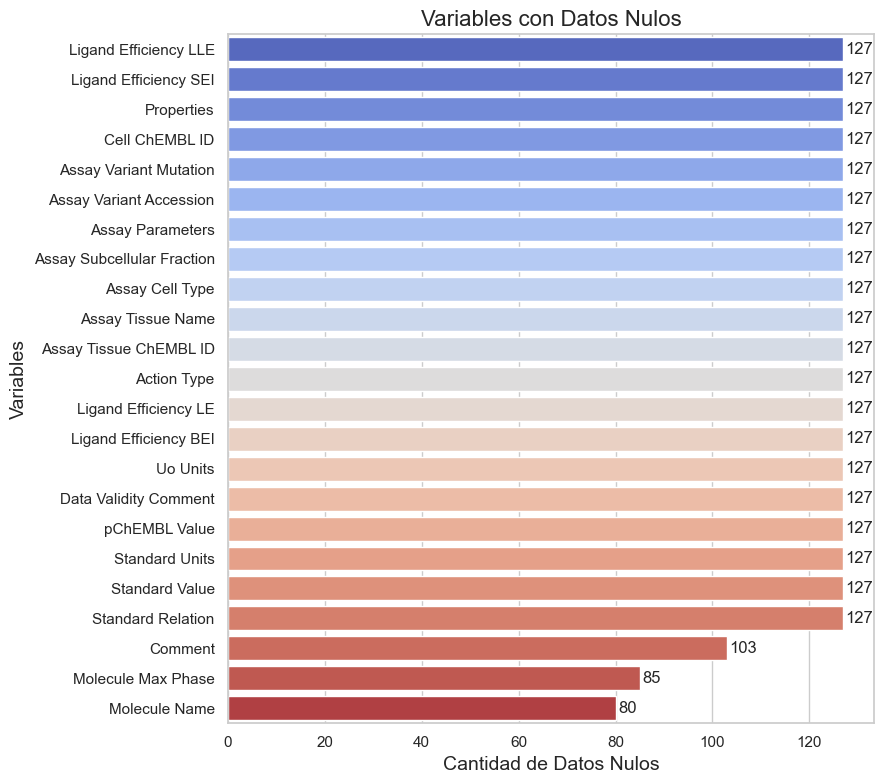

In [13]:
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
import warnings

# Suprimir advertencias futuras
warnings.simplefilter(action='ignore', category=FutureWarning)

# Configurar estilo de Seaborn
sns.set(style="whitegrid")

# Contar los datos nulos por variable
missing_data = Data1.isnull().sum()

# Filtrar para mostrar solo las variables que tienen datos nulos
missing_data = missing_data[missing_data > 0]

# Ordenar los datos nulos en orden descendente
missing_data = missing_data.sort_values(ascending=False)

# Visualizar los datos nulos en forma de gráfico de barras horizontales
plt.figure(figsize=(9, 8))  

# Cambiar la paleta a tonos de azul y rojos bajos, con más colores
palette = sns.color_palette("coolwarm", len(missing_data))  

sns.barplot(x=missing_data.values, y=missing_data.index, palette=palette, orient='h')
plt.title('Variables con Datos Nulos', fontsize=16)
plt.xlabel('Cantidad de Datos Nulos', fontsize=14)
plt.ylabel('Variables', fontsize=14)

# Agregar el texto con la cantidad de datos nulos en cada barra
for index, value in enumerate(missing_data):
    plt.text(value + 0.5, index, str(value), ha='left', va='center', fontsize=12)

plt.tight_layout()
plt.show()

In [15]:
from rdkit import Chem # type: ignore

# Función para validar los SMILES y filtrar las moléculas válidas
def validar_smiles(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return False
        Chem.SanitizeMol(mol)
        return True
    except:
        return False

# Aplicar la función para validar los SMILES y crear una columna 'SMILES_validos' en el DataFrame
Data1['SMILES_validos'] = Data1['SMILES'].apply(validar_smiles)

# Filtrar las moléculas válidas
mol_validas = Data1[Data1['SMILES_validos']]

# Calcular el número total de moléculas
total_moleculas = len(Data1)

# Calcular el número total de moléculas válidas
total_validas = len(mol_validas)

# Mostrar resumen
print("Resumen del análisis de las moléculas:")
print("------------------------------------------------------")
print("Total de moléculas:", total_moleculas)
print("Moléculas válidas:", total_validas)

Resumen del análisis de las moléculas:
------------------------------------------------------
Total de moléculas: 127
Moléculas válidas: 127


In [16]:
from rdkit import Chem  # type: ignore
import pandas as pd  # type: ignore

def clasificar_smiles(smiles):
    """
    Clasifica una cadena SMILES en tres categorías:
    - "Canónico": Si el SMILES coincide con su representación canónica.
    - "Isomérico": Si el SMILES coincide con su representación isomérica.
    - "No estándar": Si no coincide con ninguna de las anteriores.
    
    Args:
        smiles (str): Cadena SMILES a clasificar.
        
    Returns:
        str: Tipo de SMILES clasificado.
    """
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return "Inválido"
        
        # Generar SMILES canónico
        can_smiles = Chem.MolToSmiles(mol, isomericSmiles=False, canonical=True)
        
        # Generar SMILES isomérico
        iso_smiles = Chem.MolToSmiles(mol, isomericSmiles=True, canonical=True)
        
        # Clasificación de SMILES
        if smiles == can_smiles:
            return "Canónico"
        elif smiles == iso_smiles:
            return "Isomérico"
        else:
            return "No estándar"  # Para otros casos que no sean canónicos o isoméricos
    except Exception:
        return "Inválido"  # Manejo de errores en caso de un SMILES inválido

# Verificar la cantidad inicial de SMILES en el DataFrame
total_smiles_inicial = len(Data1)
print(f"Cantidad inicial de SMILES: {total_smiles_inicial}")

# Aplicar la función para clasificar los SMILES en el DataFrame
Data1['Tipo_SMILES'] = Data1['SMILES'].apply(clasificar_smiles)

# Contar los tipos de SMILES
conteo_tipos = Data1['Tipo_SMILES'].value_counts()

# Calcular el porcentaje de cada tipo de SMILES
porcentaje_tipos = (conteo_tipos / total_smiles_inicial) * 100

# Crear un DataFrame para mostrar la información de manera clara
resultado = pd.DataFrame({
    'Cantidad': conteo_tipos,
    'Porcentaje': porcentaje_tipos
}).reset_index().rename(columns={'index': 'Tipo_SMILES'})

# Mostrar los resultados en forma de tabla
print("\nClasificación de SMILES:")
print(resultado)

# Conclusiones
print("\nConclusiones:")
print(f"Se procesaron un total de {total_smiles_inicial} SMILES.")
print("La clasificación ha permitido identificar las diferentes representaciones como Canónicos e Isoméricos.")

Cantidad inicial de SMILES: 127

Clasificación de SMILES:
  Tipo_SMILES  Cantidad  Porcentaje
0   Isomérico        83   65.354331
1    Canónico        44   34.645669

Conclusiones:
Se procesaron un total de 127 SMILES.
La clasificación ha permitido identificar las diferentes representaciones como Canónicos e Isoméricos.


In [17]:
import pandas as pd
from rdkit import Chem

# Función para convertir SMILES a formato isomérico
def convert_to_isomeric_smiles(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            # Convertir a formato isomérico
            return Chem.MolToSmiles(mol, isomericSmiles=True)
        else:
            return ""
    except:
        return ""

# Aplicar la conversión en la columna de SMILES original y actualizar
def standardize_smiles_to_isomeric(df, smi_column="SMILES"):
    df[smi_column] = df[smi_column].apply(convert_to_isomeric_smiles)
    return df

# Ejemplo de uso:
Data1 = standardize_smiles_to_isomeric(Data1, smi_column="SMILES")

# Guardar el resultado en un nuevo archivo si es necesario
Data1.to_excel("Data1_isomeric_cleaned.xlsx", index=None, engine="openpyxl")

print("Estandarización completada. Todas las moléculas ahora están en formato isomérico.")

Estandarización completada. Todas las moléculas ahora están en formato isomérico.


In [18]:
# Verificar el número total de SMILES antes y después de la conversión
total_smiles = len(Data1)  # Número total de SMILES en la base de datos
smiles_vacios = Data1["SMILES"].isnull().sum()  # Cuenta cuántos SMILES están vacíos
smiles_validos = total_smiles - smiles_vacios  # SMILES válidos después de la conversión

# Mostrar la información
print(f"Total de SMILES: {total_smiles}")
print(f"Total de SMILES válidos después de la conversión: {smiles_validos}")
print(f"Total de SMILES vacíos después de la conversión: {smiles_vacios}")

# Si quieres ver los SMILES vacíos o que fallaron en la conversión
smiles_fallidos = Data1[Data1["SMILES"] == ""]
print(f"SMILES fallidos:\n{smiles_fallidos}")

Total de SMILES: 127
Total de SMILES válidos después de la conversión: 127
Total de SMILES vacíos después de la conversión: 0
SMILES fallidos:
Empty DataFrame
Columns: [Molecule ChEMBL ID, Molecule Name, Molecule Max Phase, Molecular Weight, #RO5 Violations, LogP, Compound Key, SMILES, Standard Type, Standard Relation, Standard Value, Standard Units, pChEMBL Value, Data Validity Comment, Comment, Uo Units, Ligand Efficiency BEI, Ligand Efficiency LE, Ligand Efficiency LLE, Ligand Efficiency SEI, Potential Duplicate, Assay ChEMBL ID, Assay Description, Assay Type, BAO Format ID, BAO Label, Assay Organism, Assay Tissue ChEMBL ID, Assay Tissue Name, Assay Cell Type, Assay Subcellular Fraction, Assay Parameters, Assay Variant Accession, Assay Variant Mutation, Target ChEMBL ID, Target Name, Target Organism, Target Type, Document ChEMBL ID, Source ID, Source Description, Document Journal, Document Year, Cell ChEMBL ID, Properties, Action Type, SMILES_validos, Tipo_SMILES]
Index: []

[0 rows

In [19]:
# Verificar duplicados en la columna de SMILES
duplicados = Data1[Data1.duplicated(subset=["SMILES"], keep=False)]  # Muestra todos los duplicados

# Contar el número total de duplicados
total_duplicados = Data1.duplicated(subset=["SMILES"]).sum()
total_unicos = len(Data1) - total_duplicados  # Número de SMILES únicos

# Mostrar la información
print(f"Total de SMILES: {len(Data1)}")
print(f"Total de SMILES únicos: {total_unicos}")
print(f"Total de SMILES duplicados: {total_duplicados}")

# ver algunos ejemplos de SMILES duplicados si existen
if not duplicados.empty:
    print("Ejemplos de SMILES duplicados:")
    print(duplicados.head(10))  # Muestra los primeros 10 duplicados
else:
    print("No hay SMILES duplicados.")

Total de SMILES: 127
Total de SMILES únicos: 122
Total de SMILES duplicados: 5
Ejemplos de SMILES duplicados:
    Molecule ChEMBL ID Molecule Name  Molecule Max Phase  Molecular Weight  \
17        CHEMBL269646     TIOTIDINE                -1.0            312.43   
35        CHEMBL416956    MEFLOQUINE                 4.0            378.32   
37           CHEMBL998    LORATADINE                 4.0            382.89   
38        CHEMBL418889           NaN                 NaN            439.34   
47        CHEMBL269646     TIOTIDINE                -1.0            312.43   
50           CHEMBL998    LORATADINE                 4.0            382.89   
75         CHEMBL71529           NaN                 NaN            439.34   
84        CHEMBL416956    MEFLOQUINE                 4.0            378.32   
103       CHEMBL418889           NaN                 NaN            439.34   
104        CHEMBL71529           NaN                 NaN            439.34   

     #RO5 Violations  LogP     

In [3]:
from rdkit import Chem # type: ignore
from rdkit.Chem import Crippen # type: ignore

# Función para calcular LogP y manejar casos especiales
def calculate_logP(smiles):
    """
    Calcula el LogP (coeficiente de partición octanol-agua) para una molécula 
    basada en su cadena SMILES.
    
    Dado que los datos de LogBB (coeficiente de partición cerebro-sangre) no 
    están disponibles, el LogP se utiliza como un indicador alternativo de 
    lipofilia. El LogP ayuda a inferir la capacidad de las moléculas para 
    atravesar la barrera hematoencefálica (BBB), proporcionando una aproximación 
    práctica en ausencia de datos experimentales directos.
    """
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        try:
            logP = Crippen.MolLogP(mol)
            return logP
        except Exception as e:
            print(f"Error calculando LogP para {smiles}: {e}")
            return None
    else:
        print(f"SMILES inválido: {smiles}")
        return None

# Aplicar el cálculo de LogP a cada molécula en la columna SMILES
Data1['LogP'] = Data1['SMILES'].apply(calculate_logP)

# Mostrar algunos resultados para verificar
print(Data1[['SMILES', 'LogP']].head(10))

# Guardar el DataFrame actualizado en un nuevo archivo Excel
ruta_archivo_actualizado = "Data1_con_LogP.xlsx"  # Cambia este nombre si es necesario
Data1.to_excel(ruta_archivo_actualizado, index=False)

print("Cálculo de LogP completado y guardado en el archivo.")

                                              SMILES    LogP
0  CCC(NC(=O)c1c(OCCNC(=O)Cc2ccccn2)c(-c2ccccc2)n...  5.9156
1  CC(=O)N1CCN(C(=O)Cc2ccc(Cl)c(Cl)c2)[C@H](CN2CC...  1.6618
2  CC(=O)N1CCN(C(=O)Cc2cc(F)cc(F)c2)[C@H](CN2CC[C...  0.6332
3            CNC(=C[N+](=O)[O-])NCCSCc1ccc(CN(C)C)o1  1.4590
4  CC(=O)N1CCN(C(=O)Cc2cccc([N+](=O)[O-])c2)[C@@H...  0.2632
5  O=C(Cc1ccc(Cl)c(Cl)c1)N1CCn2ccnc2[C@@H]1CN1CC[...  2.3825
6                             CCc1c(O)c(=O)ccn1CCCCO  0.8888
7  O=C(Cc1ccc(Cl)c(Cl)c1)N1CCn2ccnc2[C@H]1CN1CC[C...  2.3825
8  CN(C(=O)Cc1ccc(Cl)c(Cl)c1)[C@H](CN1CCCC1)c1ccc...  5.0750
9  CC(=O)N1CCN(C(=O)Cc2ccc([N+](=O)[O-])cc2)[C@H]...  0.2632
Cálculo de LogP completado y guardado en el archivo.


In [27]:
# Verificar el número de filas y columnas del DataFrame final
print(f"El DataFrame tiene {data_with_descriptors128.shape[0]} filas y {data_with_descriptors128.shape[1]} columnas.")

El DataFrame tiene 127 filas y 1207 columnas.


Fold 1


c:\Users\USUARIO\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1 accuracy: 0.6190
Fold 2
Fold 2 accuracy: 0.7000
Fold 3
Fold 3 accuracy: 0.7000
Fold 4
Fold 4 accuracy: 0.6000
Fold 5
Fold 5 accuracy: 0.6500
Mean CV accuracy: 0.6538 (+/- 0.0410)
Test accuracy: 0.5000


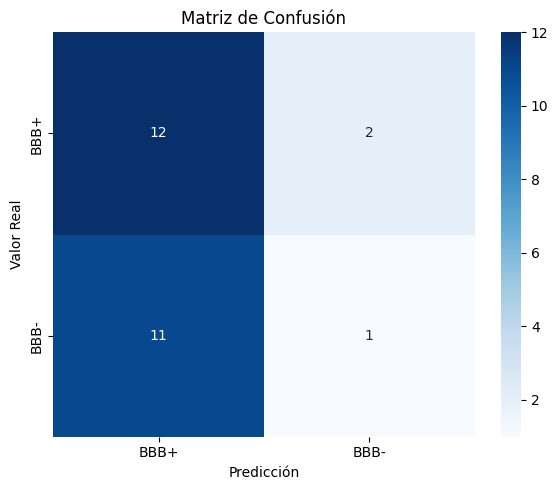


Informe de Clasificación:
              precision    recall  f1-score   support

        BBB+       0.52      0.86      0.65        14
        BBB-       0.33      0.08      0.13        12

    accuracy                           0.50        26
   macro avg       0.43      0.47      0.39        26
weighted avg       0.43      0.50      0.41        26



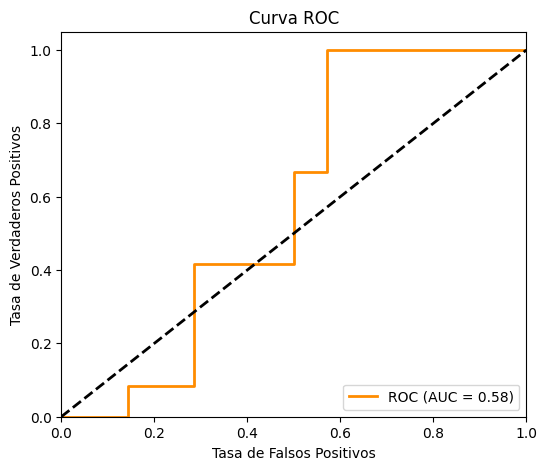

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors
import matplotlib.pyplot as plt
import seaborn as sns

"""
Carga y preprocesamiento de datos
"""
# Cargar los datos
df = pd.read_excel('data_with_descriptors128.xlsx')  


"""
Funciones de evaluación molecular
"""
def evaluate_smiles_length(smiles):
    length = len(smiles)
    if length <= 59: return 'BBB+'
    else: return 'BBB-'

def evaluate_chirality(mol):
    chiral_centers = Chem.FindMolChiralCenters(mol, includeUnassigned=True)
    return 'Quiral' if len(chiral_centers) > 0 else 'No Quiral'

def evaluate_polarity(mol):
    logp = Descriptors.MolLogP(mol)
    if -4.38 <= logp <= 10.06: return 'BBB+'
    else: return 'BBB-'

def lipinski_rule(mol):
    mw = Descriptors.ExactMolWt(mol)
    logp = Descriptors.MolLogP(mol)
    hbd = Descriptors.NumHDonors(mol)
    hba = Descriptors.NumHAcceptors(mol)
    return sum([mw <= 500, logp <= 5, hbd <= 5, hba <= 10])

def classify_molecule(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None: return 'SMILES inválido'
    length_class = evaluate_smiles_length(smiles)
    polarity_class = evaluate_polarity(mol)
    lipinski_score = lipinski_rule(mol)
    if length_class == 'BBB+' and polarity_class == 'BBB+' and lipinski_score >= 3:
        return 'BBB+'
    else:
        return 'BBB-'

"""
Aplicación de clasificaciones
"""
df['BBB_Class'] = df['SMILES'].apply(classify_molecule)
df['Chirality'] = df['SMILES'].apply(lambda x: evaluate_chirality(Chem.MolFromSmiles(x)))
df['SMILES_Length'] = df['SMILES'].apply(len)
df['Lipinski_Score'] = df['SMILES'].apply(lambda x: lipinski_rule(Chem.MolFromSmiles(x)))

"""
Preparación de datos para CNN
"""
def smiles_to_fingerprint(smiles, size=127):
    mol = Chem.MolFromSmiles(smiles)
    return list(AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=size)) if mol else [0] * size

features = ['nHBAcc', 'nHBDon', 'MW', 'TopoPSA', 'LabuteASA', 'SMILES_Length', 'Lipinski_Score']
X_fp = np.array([smiles_to_fingerprint(smile) for smile in df['SMILES']])
X_features = df[features].values
X_combined = np.concatenate([X_fp, X_features], axis=1)

"""
Codificación de la variable objetivo
"""
df['BBB_Class_Numeric'] = df['BBB_Class'].map({
    'BBB+': 0, 
    'BBB-': 1
})
y = to_categorical(df['BBB_Class_Numeric'])

"""
División de datos
"""
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

"""
Escalado de características
"""
scaler = StandardScaler()
X_train[:, -len(features):] = scaler.fit_transform(X_train[:, -len(features):])
X_test[:, -len(features):] = scaler.transform(X_test[:, -len(features):])

"""
Reshape para CNN
"""
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

"""
Definición del modelo CNN
"""
def create_model(input_shape, filters=100, kernel_size=5, dense_units=16, dropout_rate=0.3, learning_rate=0.00001, l2_lambda=0.01):
    model = Sequential([
        Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=input_shape, kernel_regularizer=l2(l2_lambda)),
        MaxPooling1D(pool_size=2),
        Dropout(dropout_rate),
        Conv1D(filters=filters*2, kernel_size=kernel_size, activation='relu', kernel_regularizer=l2(l2_lambda)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(dense_units, activation='relu', kernel_regularizer=l2(l2_lambda)),
        Dropout(dropout_rate),
        Dense(2, activation='softmax')  # Cambiado a 2 clases
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

"""
Implementación de validación cruzada
"""
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

cv_scores = []
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train), 1):
    print(f'Fold {fold}')
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
    
    model = create_model(input_shape=(X_train_fold.shape[1], 1))
    
    history = model.fit(
        X_train_fold, y_train_fold,
        epochs=200, batch_size=64,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping, reduce_lr],
        verbose=0
    )
    
    scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    cv_scores.append(scores[1])
    print(f'Fold {fold} accuracy: {scores[1]:.4f}')

print(f'Mean CV accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})')

"""
Entrenamiento del modelo final
"""
final_model = create_model(input_shape=(X_train.shape[1], 1))
final_history = final_model.fit(
    X_train, y_train,
    epochs=200, batch_size=64, validation_split=0.01,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

"""
Evaluación del modelo
"""
test_loss, test_accuracy = final_model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy:.4f}')

y_pred = final_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

"""
Visualización de resultados
"""
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['BBB+', 'BBB-'], yticklabels=['BBB+', 'BBB-'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

print("\nInforme de Clasificación:")
print(classification_report(y_test_classes, y_pred_classes, target_names=['BBB+', 'BBB-']))

# Curva ROC
fpr, tpr, _ = roc_curve(y_test_classes, y_pred[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Cargando dataset...

=== ANÁLISIS DEL DATASET ===
Número total de filas: 127
Número total de columnas: 1205

Tipos de datos en el DataFrame:
float64    835
int64      349
object      19
bool         2
Name: count, dtype: int64

Columnas con valores nulos:
Molecule Name                  80
Molecule Max Phase             85
Standard Relation             127
Standard Value                127
Standard Units                127
pChEMBL Value                 127
Data Validity Comment         127
Comment                       103
Uo Units                      127
Ligand Efficiency BEI         127
Ligand Efficiency LE          127
Ligand Efficiency LLE         127
Ligand Efficiency SEI         127
Assay Tissue ChEMBL ID        127
Assay Tissue Name             127
Assay Cell Type               127
Assay Subcellular Fraction    127
Assay Parameters              127
Assay Variant Accession       127
Assay Variant Mutation        127
Cell ChEMBL ID                127
Properties                    

c:\Users\USUARIO\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Fold 1 accuracy: 0.9048
Fold 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Fold 2 accuracy: 0.0500
Fold 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Fold 3 accuracy: 0.8000
Fold 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Fold 4 accuracy: 0.5500
Fold 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Fold 5 accuracy: 0.3500

Mean CV accuracy: 0.5310 (+/- 0.3087)

Entrenando modelo final...
Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.6066 - loss: 2.2663 - val_accuracy: 0.7143 - val_loss: 2.2230 - learning_rate: 1.0000e-04
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6283 - loss: 2.2432 - val_accuracy: 0.7143 - val_loss: 2.2029 - learning_rate: 1.0000e-04
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6826 - loss: 2.2181 - val_accuracy: 0.7143 - val_loss: 2.1840 - learning_rate: 1.0000e-04
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6163 - loss: 2.2606 - val_accuracy: 0.7143 - val_loss: 2.1670 - learning

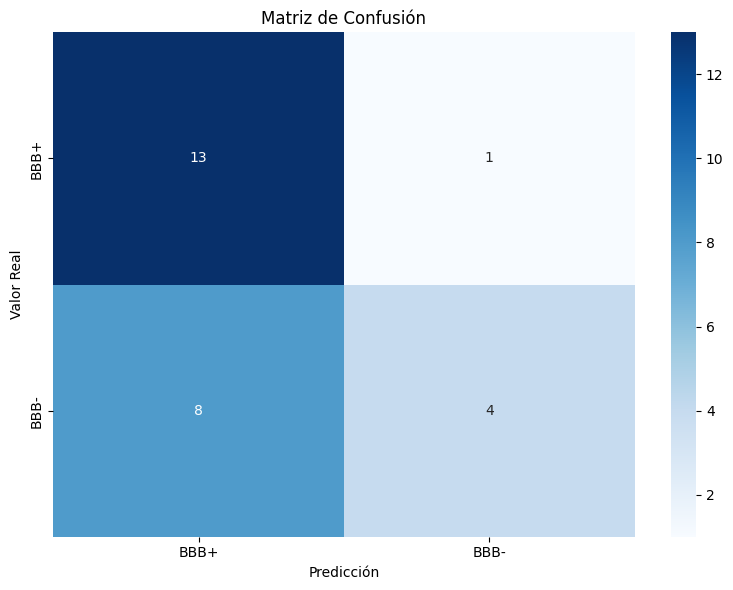


Informe de Clasificación:
              precision    recall  f1-score   support

        BBB+       0.62      0.93      0.74        14
        BBB-       0.80      0.33      0.47        12

    accuracy                           0.65        26
   macro avg       0.71      0.63      0.61        26
weighted avg       0.70      0.65      0.62        26



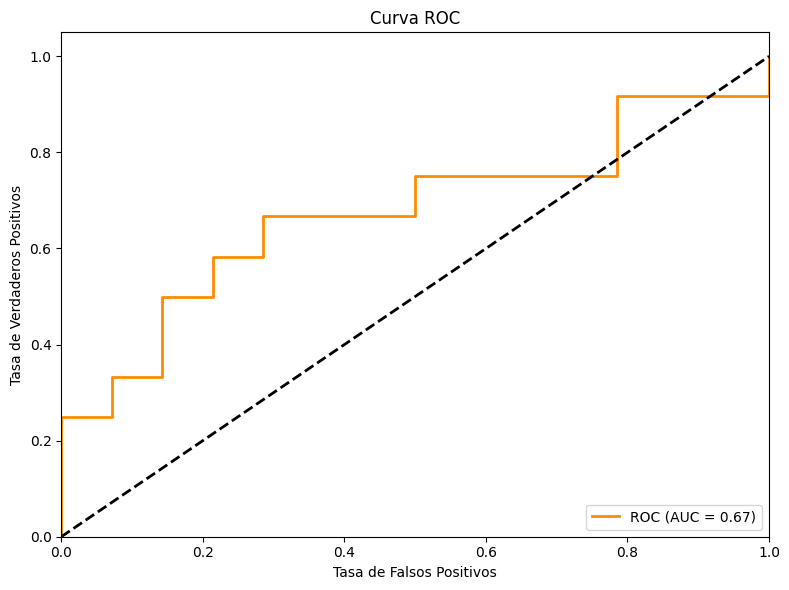


Guardando resultados...

Proceso completado. Los resultados se han guardado en 'model_results.txt'


In [11]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_dataset(df):
    """Analiza el DataFrame y muestra información detallada"""
    print("\n=== ANÁLISIS DEL DATASET ===")
    print(f"Número total de filas: {len(df)}")
    print(f"Número total de columnas: {df.shape[1]}")
    
    print("\nTipos de datos en el DataFrame:")
    print(df.dtypes.value_counts())
    
    print("\nColumnas con valores nulos:")
    null_counts = df.isnull().sum()
    print(null_counts[null_counts > 0])
    
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    print(f"\nNúmero de variables numéricas: {len(numeric_cols)}")
    
    return numeric_cols

def evaluate_smiles_length(smiles):
    length = len(smiles)
    if length <= 59: return 'BBB+'
    else: return 'BBB-'

def evaluate_polarity(mol):
    logp = Descriptors.MolLogP(mol)
    if -4.38 <= logp <= 10.06: return 'BBB+'
    else: return 'BBB-'

def lipinski_rule(mol):
    mw = Descriptors.ExactMolWt(mol)
    logp = Descriptors.MolLogP(mol)
    hbd = Descriptors.NumHDonors(mol)
    hba = Descriptors.NumHAcceptors(mol)
    return sum([mw <= 500, logp <= 5, hbd <= 5, hba <= 10])

def classify_molecule(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None: return 'SMILES inválido'
    length_class = evaluate_smiles_length(smiles)
    polarity_class = evaluate_polarity(mol)
    lipinski_score = lipinski_rule(mol)
    if length_class == 'BBB+' and polarity_class == 'BBB+' and lipinski_score >= 3:
        return 'BBB+'
    else:
        return 'BBB-'

# Cargar datos
print("Cargando dataset...")
df = pd.read_excel('data_with_descriptors128.xlsx')

# Analizar dataset
numeric_cols = analyze_dataset(df)
print("\nPrimeras columnas numéricas encontradas:")
print(list(numeric_cols)[:10])

# Aplicar clasificaciones
print("\nAplicando clasificaciones moleculares...")
df['BBB_Class'] = df['SMILES'].apply(classify_molecule)
df['SMILES_Length'] = df['SMILES'].apply(len)
df['Lipinski_Score'] = df['SMILES'].apply(lambda x: lipinski_rule(Chem.MolFromSmiles(x)))

# Preparar features
print("\nPreparando características...")
X_descriptors = df[numeric_cols].fillna(0).values  # Usar todas las variables numéricas

def smiles_to_fingerprint(smiles, size=2048):
    mol = Chem.MolFromSmiles(smiles)
    return list(AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=size)) if mol else [0] * size

print("Generando fingerprints...")
X_fp = np.array([smiles_to_fingerprint(smile) for smile in df['SMILES']])

# Aplicar PCA con varianza explicada
print("\nAplicando PCA...")
pca_fp = PCA(n_components=0.95)
X_fp_reduced = pca_fp.fit_transform(X_fp)
print(f"Componentes PCA de fingerprints: {X_fp_reduced.shape[1]}")

pca_desc = PCA(n_components=0.95)
X_descriptors_reduced = pca_desc.fit_transform(X_descriptors)
print(f"Componentes PCA de descriptores: {X_descriptors_reduced.shape[1]}")

# Combinar características
X_combined = np.concatenate([X_fp_reduced, X_descriptors_reduced], axis=1)
print(f"Dimensiones finales de datos: {X_combined.shape}")

# Preparar variable objetivo
df['BBB_Class_Numeric'] = df['BBB_Class'].map({'BBB+': 0, 'BBB-': 1})
y = to_categorical(df['BBB_Class_Numeric'])

# División y escalado de datos
print("\nDividiendo y escalando datos...")
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Calcular pesos de clase
class_counts = np.sum(y_train, axis=0)
class_weights = dict(enumerate(len(y_train) / (2 * class_counts)))

# Escalar datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape para CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

def create_model(input_shape, filters=32, kernel_size=3, dense_units=64, dropout_rate=0.3, learning_rate=0.0001, l2_lambda=0.01):
    model = Sequential([
        Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', 
               input_shape=input_shape, kernel_regularizer=l2(l2_lambda)),
        MaxPooling1D(pool_size=2),
        Dropout(dropout_rate),
        Conv1D(filters=filters*2, kernel_size=kernel_size, activation='relu', 
               kernel_regularizer=l2(l2_lambda)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(dense_units, activation='relu', kernel_regularizer=l2(l2_lambda)),
        Dropout(dropout_rate),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), 
                 loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Validación cruzada
print("\nIniciando validación cruzada...")
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
]

cv_scores = []
all_predictions = []
all_true_values = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train), 1):
    print(f'Fold {fold}')
    X_train_fold = X_train[train_idx]
    X_val_fold = X_train[val_idx]
    y_train_fold = y_train[train_idx]
    y_val_fold = y_train[val_idx]
    
    model = create_model(input_shape=(X_train_fold.shape[1], 1))
    
    history = model.fit(
        X_train_fold, y_train_fold,
        epochs=200, batch_size=16,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=callbacks,
        class_weight=class_weights,
        verbose=0
    )
    
    scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    cv_scores.append(scores[1])
    
    # Guardar predicciones
    y_pred = model.predict(X_val_fold)
    all_predictions.extend(np.argmax(y_pred, axis=1))
    all_true_values.extend(np.argmax(y_val_fold, axis=1))
    
    print(f'Fold {fold} accuracy: {scores[1]:.4f}')

print(f'\nMean CV accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})')

# Entrenamiento del modelo final
print("\nEntrenando modelo final...")
final_model = create_model(input_shape=(X_train.shape[1], 1))
final_history = final_model.fit(
    X_train, y_train,
    epochs=200, batch_size=16,
    validation_split=0.2,
    callbacks=callbacks,
    class_weight=class_weights,
    verbose=1
)

# Evaluación final
print("\nEvaluando modelo final...")
test_loss, test_accuracy = final_model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy:.4f}')

y_pred = final_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Visualizaciones
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['BBB+', 'BBB-'], 
            yticklabels=['BBB+', 'BBB-'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

print("\nInforme de Clasificación:")
print(classification_report(y_test_classes, y_pred_classes, target_names=['BBB+', 'BBB-']))

# Curva ROC
fpr, tpr, _ = roc_curve(y_test_classes, y_pred[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Guardar resultados e información del modelo
print("\nGuardando resultados...")
results = {
    'mean_cv_accuracy': np.mean(cv_scores),
    'std_cv_accuracy': np.std(cv_scores),
    'test_accuracy': test_accuracy,
    'n_features': X_combined.shape[1],
    'n_samples': len(df),
    'n_descriptors': len(numeric_cols),
    'n_fp_components': X_fp_reduced.shape[1],
    'n_desc_components': X_descriptors_reduced.shape[1]
}

# Guardar en archivo
with open('model_results.txt', 'w') as f:
    for key, value in results.items():
        f.write(f"{key}: {value}\n")

print("\nProceso completado. Los resultados se han guardado en 'model_results.txt'")

# Modelo enfoque 1 realizado bajo los analisis y resultados practicados a SMILES

Número total de descriptores originales: 1389
Número de descriptores sin nulos: 1376
Componentes PCA de fingerprints: 815
Componentes PCA de descriptores: 4
Dimensiones finales de datos: (20576, 819)
Fold 1


c:\Users\USUARIO\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1 accuracy: 0.9775
Fold 2
Fold 2 accuracy: 0.2555
Fold 3
Fold 3 accuracy: 0.1965
Fold 4
Fold 4 accuracy: 0.6753
Fold 5
Fold 5 accuracy: 0.0313
Mean CV accuracy: 0.4272 (+/- 0.3475)
Epoch 1/200
412/412 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.3707 - loss: 2.2523 - val_accuracy: 0.0097 - val_loss: 1.1565 - learning_rate: 5.0000e-04
Epoch 2/200
412/412 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.1177 - loss: 1.1183 - val_accuracy: 0.5331 - val_loss: 1.0051 - learning_rate: 5.0000e-04
Epoch 3/200
412/412 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.2014 - loss: 1.0316 - val_accuracy: 0.9104 - val_loss: 0.8623 - learning_rate: 5.0000e-04
Epoch 4/200
412/412 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.6128 - loss: 0.8514 - val_accuracy: 0.3360 - val_loss: 0.8856 - learning_rate: 5.0000e-04
Epoch 5/200
412/412 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.6919 - loss: 0.7177 - val_accuracy: 0.8338 - val_loss: 0.7268 - learning_rate: 5.0000e-04
Epoch 6/200
412/412

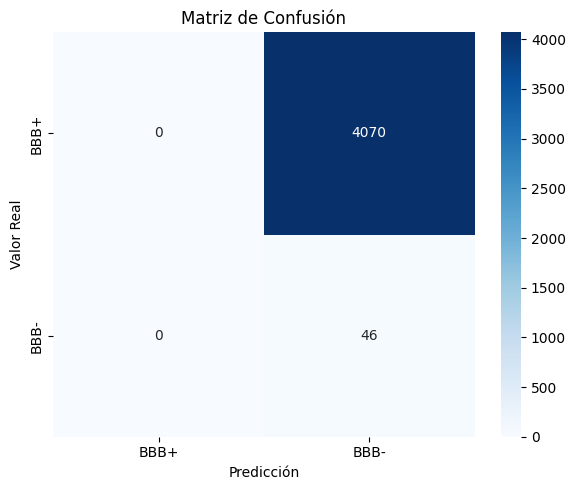


Informe de Clasificación:
              precision    recall  f1-score   support

        BBB+       0.00      0.00      0.00      4070
        BBB-       0.01      1.00      0.02        46

    accuracy                           0.01      4116
   macro avg       0.01      0.50      0.01      4116
weighted avg       0.00      0.01      0.00      4116



c:\Users\USUARIO\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USUARIO\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USUARIO\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


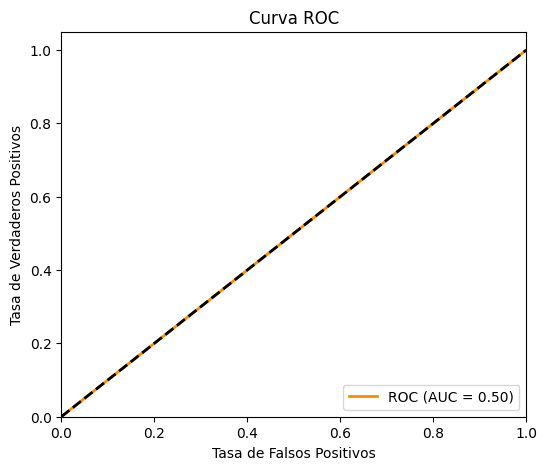

In [5]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors
import matplotlib.pyplot as plt
import seaborn as sns

"""
Carga y preprocesamiento de datos
"""
file_path = r'C:\Users\USUARIO\Desktop\nuevo\Validacion.csv'
df = pd.read_csv(file_path, low_memory=False)

"""
Funciones de evaluación molecular
"""
def evaluate_smiles_length(smiles):
    length = len(smiles)
    if length <= 59: return 'BBB+'
    else: return 'BBB-'

def evaluate_polarity(mol):
    logp = Descriptors.MolLogP(mol)
    if -4.38 <= logp <= 10.06: return 'BBB+'
    else: return 'BBB-'

def lipinski_rule(mol):
    mw = Descriptors.ExactMolWt(mol)
    logp = Descriptors.MolLogP(mol)
    hbd = Descriptors.NumHDonors(mol)
    hba = Descriptors.NumHAcceptors(mol)
    return sum([mw <= 500, logp <= 5, hbd <= 5, hba <= 10])

def classify_molecule(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None: return 'SMILES inválido'
    length_class = evaluate_smiles_length(smiles)
    polarity_class = evaluate_polarity(mol)
    lipinski_score = lipinski_rule(mol)
    if length_class == 'BBB+' and polarity_class == 'BBB+' and lipinski_score >= 3:
        return 'BBB+'
    else:
        return 'BBB-'

"""
Aplicación de clasificaciones
"""
df['BBB_Class'] = df['SMILES'].apply(classify_molecule)
df['SMILES_Length'] = df['SMILES'].apply(len)
df['Lipinski_Score'] = df['SMILES'].apply(lambda x: lipinski_rule(Chem.MolFromSmiles(x)))

"""
Preparación de datos para CNN y reducción de dimensionalidad
"""
# Obtener descriptores numéricos sin valores nulos
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
# Eliminar columnas con valores nulos
columns_without_null = df[numerical_features].columns[df[numerical_features].notna().all()]
print(f"Número total de descriptores originales: {len(numerical_features)}")
print(f"Número de descriptores sin nulos: {len(columns_without_null)}")

X_descriptors = df[columns_without_null].values

# Preparar fingerprints
def smiles_to_fingerprint(smiles, size=2048):
    mol = Chem.MolFromSmiles(smiles)
    return list(AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=size)) if mol else [0] * size

# Generar fingerprints
X_fp = np.array([smiles_to_fingerprint(smile) for smile in df['SMILES']])

# Aplicar PCA a los fingerprints
pca_fp = PCA(n_components=0.95)
X_fp_reduced = pca_fp.fit_transform(X_fp)
print(f"Componentes PCA de fingerprints: {X_fp_reduced.shape[1]}")

# Aplicar PCA a los descriptores
pca_desc = PCA(n_components=0.95)
X_descriptors_reduced = pca_desc.fit_transform(X_descriptors)
print(f"Componentes PCA de descriptores: {X_descriptors_reduced.shape[1]}")

# Combinar características reducidas
X_combined = np.concatenate([X_fp_reduced, X_descriptors_reduced], axis=1)
print(f"Dimensiones finales de datos: {X_combined.shape}")

"""
Codificación de la variable objetivo
"""
df['BBB_Class_Numeric'] = df['BBB_Class'].map({
    'BBB+': 0, 
    'BBB-': 1
})
y = to_categorical(df['BBB_Class_Numeric'])

"""
División de datos y escalado
"""
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Calcular pesos de clase para manejar el desbalanceo
class_counts = np.sum(y_train, axis=0)
class_weights = dict(enumerate(len(y_train) / (2 * class_counts)))

"""
Escalado de características
"""
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

"""
Reshape para CNN
"""
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

"""
Definición del modelo CNN
"""
def create_model(input_shape, filters=16, kernel_size=3, dense_units=64, dropout_rate=0.3, learning_rate=0.0005, l2_lambda=0.01):
    model = Sequential([
        Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=input_shape, kernel_regularizer=l2(l2_lambda)),
        MaxPooling1D(pool_size=2),
        Dropout(dropout_rate),
        Conv1D(filters=filters*2, kernel_size=kernel_size, activation='relu', kernel_regularizer=l2(l2_lambda)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(dense_units, activation='relu', kernel_regularizer=l2(l2_lambda)),
        Dropout(dropout_rate),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

"""
Implementación de validación cruzada
"""
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

cv_scores = []
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train), 1):
    print(f'Fold {fold}')
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
    
    model = create_model(input_shape=(X_train_fold.shape[1], 1))
    
    history = model.fit(
        X_train_fold, y_train_fold,
        epochs=200, batch_size=32,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping, reduce_lr],
        class_weight=class_weights,
        verbose=0
    )
    
    scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    cv_scores.append(scores[1])
    print(f'Fold {fold} accuracy: {scores[1]:.4f}')

print(f'Mean CV accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})')

"""
Entrenamiento del modelo final
"""
final_model = create_model(input_shape=(X_train.shape[1], 1))
final_history = final_model.fit(
    X_train, y_train,
    epochs=200, batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weights,
    verbose=1
)

"""
Evaluación del modelo
"""
test_loss, test_accuracy = final_model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy:.4f}')

y_pred = final_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

"""
Visualización de resultados
"""
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['BBB+', 'BBB-'], yticklabels=['BBB+', 'BBB-'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

print("\nInforme de Clasificación:")
print(classification_report(y_test_classes, y_pred_classes, target_names=['BBB+', 'BBB-']))

# Curva ROC
fpr, tpr, _ = roc_curve(y_test_classes, y_pred[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Número total de descriptores originales: 1390
Número de descriptores sin nulos: 1377
Componentes PCA de fingerprints: 815
Componentes PCA de descriptores: 4
Dimensiones finales de datos: (20576, 819)

Distribución de clases después del submuestreo:
Clase 0: 15 muestras
Clase 1: 15 muestras


c:\Users\USUARIO\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.5833 - loss: 2.1635 - val_accuracy: 0.0000e+00 - val_loss: 2.8379 - learning_rate: 5.0000e-04
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.6250 - loss: 2.1063 - val_accuracy: 0.6667 - val_loss: 2.0477 - learning_rate: 5.0000e-04
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.7500 - loss: 1.9881 - val_accuracy: 0.6667 - val_loss: 2.0368 - learning_rate: 5.0000e-04
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.7917 - loss: 1.9377 - val_accuracy: 0.1667 - val_loss: 2.3464 - learning_rate: 5.0000e-04
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.7917 - loss: 1.8459 - val_accuracy: 0.1667 - val_loss: 2.5572 - learning_rate: 5.0000e-04
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 0.9583 - loss: 1.6713 - val_accuracy: 0.1667 - val_loss: 2.6530 - learning_rate: 5.0000e-04
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.8333

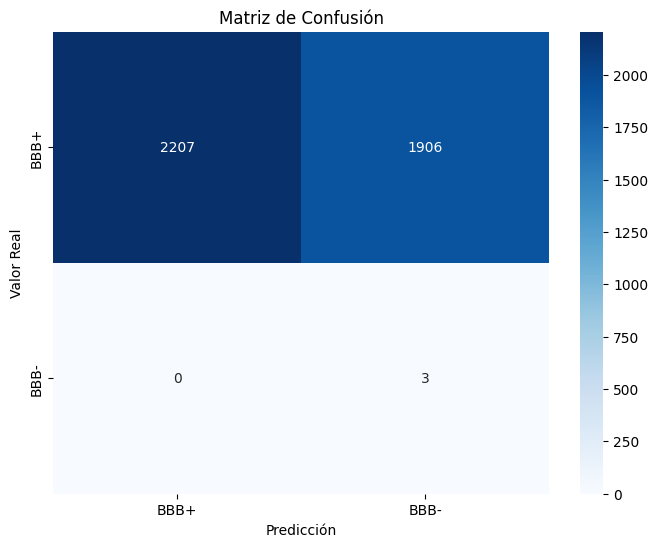

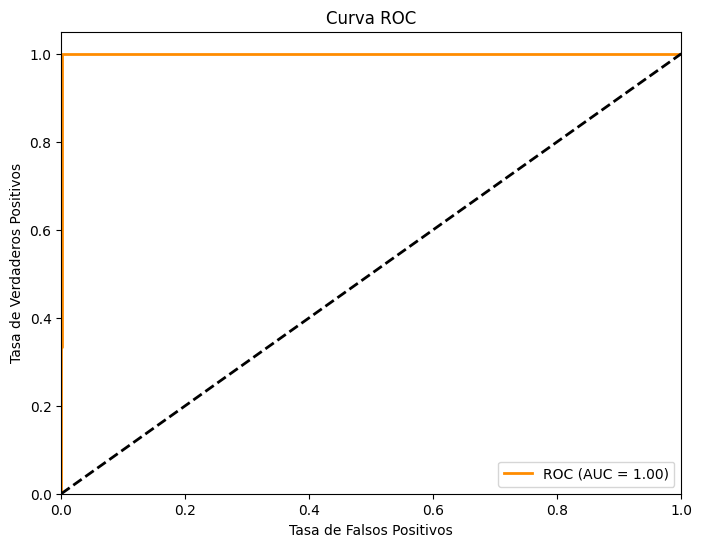

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from imblearn.under_sampling import RandomUnderSampler

def evaluate_smiles_length(smiles):
    return 'BBB+' if len(smiles) <= 100 else 'BBB-'

def evaluate_chirality(mol):
    chiral_centers = Chem.FindMolChiralCenters(mol, includeUnassigned=True)
    return 'Quiral' if len(chiral_centers) > 0 else 'No Quiral'

def evaluate_polarity(mol):
    logp = Descriptors.MolLogP(mol)
    if -4.38 <= logp <= 10.06: return 'BBB+'
    else: return 'BBB-'

def lipinski_rule(mol):
    mw = Descriptors.ExactMolWt(mol)
    logp = Descriptors.MolLogP(mol)
    hbd = Descriptors.NumHDonors(mol)
    hba = Descriptors.NumHAcceptors(mol)
    return sum([mw <= 500, logp <= 5, hbd <= 5, hba <= 10])

def classify_molecule(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None: return 'SMILES inválido'
    length_class = evaluate_smiles_length(smiles)
    polarity_class = evaluate_polarity(mol)
    lipinski_score = lipinski_rule(mol)
    if length_class == 'BBB+' and polarity_class == 'BBB+' and lipinski_score >= 3:
        return 'BBB+'
    else:
        return 'BBB-'

"""
Aplicación de clasificaciones
"""
df['BBB_Class'] = df['SMILES'].apply(classify_molecule)
df['Chirality'] = df['SMILES'].apply(lambda x: evaluate_chirality(Chem.MolFromSmiles(x)))
df['SMILES_Length'] = df['SMILES'].apply(len)
df['Lipinski_Score'] = df['SMILES'].apply(lambda x: lipinski_rule(Chem.MolFromSmiles(x)))

"""
Preparación de datos para CNN y reducción de dimensionalidad
"""
# Obtener descriptores numéricos sin valores nulos
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
# Eliminar columnas con valores nulos
columns_without_null = df[numerical_features].columns[df[numerical_features].notna().all()]
print(f"Número total de descriptores originales: {len(numerical_features)}")
print(f"Número de descriptores sin nulos: {len(columns_without_null)}")

X_descriptors = df[columns_without_null].values

# Preparar fingerprints
def smiles_to_fingerprint(smiles, size=2048):
    mol = Chem.MolFromSmiles(smiles)
    return list(AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=size)) if mol else [0] * size

# Generar fingerprints
X_fp = np.array([smiles_to_fingerprint(smile) for smile in df['SMILES']])

# Aplicar PCA a los fingerprints
pca_fp = PCA(n_components=0.95)
X_fp_reduced = pca_fp.fit_transform(X_fp)
print(f"Componentes PCA de fingerprints: {X_fp_reduced.shape[1]}")

# Aplicar PCA a los descriptores
pca_desc = PCA(n_components=0.95)
X_descriptors_reduced = pca_desc.fit_transform(X_descriptors)
print(f"Componentes PCA de descriptores: {X_descriptors_reduced.shape[1]}")

# Combinar características reducidas
X_combined = np.concatenate([X_fp_reduced, X_descriptors_reduced], axis=1)
print(f"Dimensiones finales de datos: {X_combined.shape}")

"""
Codificación de la variable objetivo y división de datos
"""
df['BBB_Class_Numeric'] = df['BBB_Class'].map({'BBB+': 0, 'BBB-': 1})
y = to_categorical(df['BBB_Class_Numeric'])

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

"""
Aplicar submuestreo a los datos de entrenamiento
"""
# Aplicar submuestreo solo al conjunto de entrenamiento
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, np.argmax(y_train, axis=1))
y_train_resampled = to_categorical(y_train_resampled)

# Imprimir información sobre el balance de clases
print("\nDistribución de clases después del submuestreo:")
unique, counts = np.unique(np.argmax(y_train_resampled, axis=1), return_counts=True)
for clase, count in zip(unique, counts):
    print(f"Clase {clase}: {count} muestras")

"""
Escalado de características
"""
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

"""
Reshape para CNN
"""
X_train_resampled = X_train_resampled.reshape(X_train_resampled.shape[0], X_train_resampled.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

"""
Definición y entrenamiento del modelo
"""
def create_model(input_shape, filters=16, kernel_size=3, dense_units=64, dropout_rate=0.3, learning_rate=0.0005, l2_lambda=0.01):
    model = Sequential([
        Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=input_shape, kernel_regularizer=l2(l2_lambda)),
        MaxPooling1D(pool_size=2),
        Dropout(dropout_rate),
        Conv1D(filters=filters*2, kernel_size=kernel_size, activation='relu', kernel_regularizer=l2(l2_lambda)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(dense_units, activation='relu', kernel_regularizer=l2(l2_lambda)),
        Dropout(dropout_rate),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Crear y entrenar el modelo
model = create_model(input_shape=(X_train_resampled.shape[1], 1))
history = model.fit(
    X_train_resampled, y_train_resampled,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

"""
Evaluación del modelo
"""
# Predicciones
y_pred = model.predict(X_test)
y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Métricas
print("\nInforme de Clasificación:")
print(classification_report(y_test_classes, y_pred_classes, target_names=['BBB+', 'BBB-']))

# Matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['BBB+', 'BBB-'], yticklabels=['BBB+', 'BBB-'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_test_classes, y_pred[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Modelo enfoque 3

# MODELO VALIDADO

Distribución original de clases: Counter({0: 12345, 1: 8231})


c:\Users\USUARIO\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\USUARIO\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\USUARIO\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
[I 2024-11-14 19:00:49,141] A new study created in memory with name: no-name-8ee5d046-773e-48c6-a8ff-e8d8ae8c167f
[I 2024-11-14 19:02:29,669] Trial 0 finished with value: 0.9059912719265235 and parameters: {'n_estimators': 109, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.9059912719265235.
[I 2024-11-14 19:04:12,238] Trial 1 finished with value: 0.9048523486003965 and para


Mejores hiperparámetros encontrados:
{'n_estimators': 197, 'max_depth': 18, 'min_samples_split': 4, 'min_samples_leaf': 1}


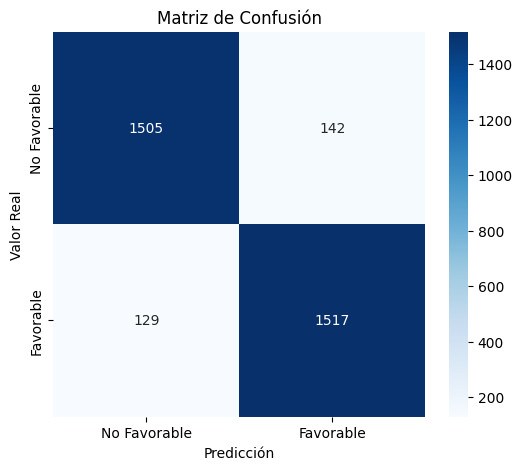

,precision,recall,f1-score,support
0,0.921,0.914,0.917,1647.000
1,0.914,0.922,0.918,1646.000
accuracy,0.918,0.918,0.918,0.918
macro avg,0.918,0.918,0.918,3293.000
weighted avg,0.918,0.918,0.918,3293.000


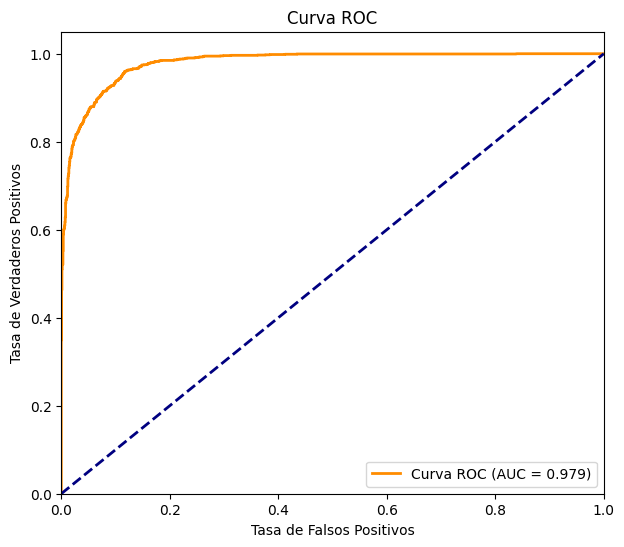

,Característica,Importancia
5,logP,0.026
8,PSA,0.024
1329,TopoPSA(NO),0.020
1330,TopoPSA,0.017
7,logSw,0.016
1327,SLogP,0.015
1088,ZMIC1,0.011
325,ATSC0p,0.010
1156,MID_C,0.009
1098,LabuteASA,0.009


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from IPython.display import display, HTML
import optuna

def crear_modelo_prediccion(df, criterios):
    """
    Crea y evalúa un modelo predictivo basado en todas las variables del dataset.
    """
    # 1. Calcular el drug_score usando los criterios
    scores = pd.DataFrame()
    for var, ranges in criterios.items():
        scores[f'{var}_score'] = df[var].apply(lambda x: max(0, min(1, 
            1 - abs(x - (ranges['min'] + ranges['max'])/2) / ((ranges['max'] - ranges['min'])/2)
        )))
    drug_score = scores.mean(axis=1)

    # Crear variable objetivo basada en el drug_score
    threshold = drug_score.quantile(0.6)
    y = (drug_score >= threshold).astype(int)
    
    # Seleccionar todas las variables numéricas como características
    X = df.select_dtypes(include=[np.number])

    # Balanceo de clases mediante submuestreo
    class_count = Counter(y)
    print(f"Distribución original de clases: {class_count}")

    # Submuestreo de la clase mayoritaria
    if class_count[0] > class_count[1]:  # Si hay más 0s que 1s
        X_majority = X[y == 0]
        y_majority = y[y == 0]
        X_majority_downsampled = X_majority.sample(class_count[1], random_state=42)
        y_majority_downsampled = y_majority.sample(class_count[1], random_state=42)

        X_balanced = pd.concat([X_majority_downsampled, X[y == 1]])
        y_balanced = pd.concat([y_majority_downsampled, y[y == 1]])
    else:
        X_balanced = X
        y_balanced = y

    # División train-test
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)
    
    # Escalado de características
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # 2. Optimización de hiperparámetros usando Optuna
    def objective(trial):
        n_estimators = trial.suggest_int('n_estimators', 50, 200)
        max_depth = trial.suggest_int('max_depth', 1, 20)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)

        rf_model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        )
        
        # Validación cruzada para la evaluación de cada conjunto de hiperparámetros
        cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
        return np.mean(cv_scores)

    # Crear un estudio Optuna
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=50)

    # Obtener el mejor conjunto de hiperparámetros
    best_params = study.best_params
    print("\nMejores hiperparámetros encontrados:")
    print(best_params)
    
    # 3. Crear y entrenar el modelo con los mejores hiperparámetros
    rf_model = RandomForestClassifier(**best_params, random_state=42)
    rf_model.fit(X_train_scaled, y_train)

    # 4. Predicciones
    y_pred = rf_model.predict(X_test_scaled)
    y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
    
    # 5. Evaluación del modelo
    display(HTML("<h2 style='color: #2C3E50; font-family: Arial'>Evaluación del Modelo Predictivo</h2>"))
    
    # 5.1 Matriz de confusión
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Favorable', 'Favorable'],
                yticklabels=['No Favorable', 'Favorable'])
    plt.title('Matriz de Confusión')
    plt.ylabel('Valor Real')
    plt.xlabel('Predicción')
    plt.show()
    
    # 5.2 Reporte de clasificación
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    display(HTML("<h3 style='color: #2C3E50'>Métricas de Clasificación</h3>"))
    display(report_df.style
           .format("{:.3f}")
           .set_table_styles([{'selector': 'th', 'props': [('background-color', '#2C3E50'),
                                                           ('color', 'white'),
                                                           ('font-weight', 'bold'),
                                                           ('padding', '10px')]}]))
    
    # 5.3 Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show()
    
    # 6. Importancia de características
    display(HTML("<h3 style='color: #2C3E50'>Importancia de Características</h3>"))
    feature_importance = pd.DataFrame({
        'Característica': X.columns,
        'Importancia': rf_model.feature_importances_
    }).sort_values('Importancia', ascending=False)
    
    # Mostrar solo las 20 mejores características
    top_20_features = feature_importance.head(20)
    
    display(top_20_features.style
           .format({'Importancia': '{:.3f}'}))
    
    return rf_model, scaler, top_20_features

# Cargar datos
file_path = r'C:\Users\USUARIO\Desktop\nuevo\Validacion.csv'
df = pd.read_csv(file_path, low_memory=False)

# criterios_permeabilidad_BHE
criterios = {
    'logP': {'min': -2, 'max': 5},
    'MW': {'min': 160, 'max': 500},
    'TopoPSA': {'min': 20, 'max': 90},
    'nHBAcc': {'min': 0, 'max': 10},
    'nHBDon': {'min': 0, 'max': 5},
    'nRot': {'min': 0, 'max': 8},
    'nAromAtom': {'min': 3, 'max': 15},
    'VMcGowan': {'min': 0.8, 'max': 2.5},
    'LabuteASA': {'min': 60, 'max': 180}
}

# Crear y evaluar el modelo con todas las variables
model, scaler, top_20_features = crear_modelo_prediccion(df, criterios)


In [1]:
import pandas as pd # type: ignore
from IPython.display import display # type: ignore

# Cargar el archivo Excel
archivo_excel = r'C:\Users\USUARIO\Desktop\nuevo\20MILMOLECULAS.xlsx'
Data1 = pd.read_excel(archivo_excel)

# Mostrar las primeras filas del DataFrame
display(Data1.head())

,IDNUMBER,available,H_acceptor,H_donor,B_rotN,N_O,logP,logD,logSw,PSA,...,PERCENTSP3,Link,STEREO,State,ID,ROMol,CLNUMBER,Saltdata,Saltdata_MW,CAS
0,Y206-1106,12,4.0,1.0,7.0,5,3.4973,3.4963,-3.8826,39.0320,...,35.00,https://www.chemdiv.com/catalog/screening-comp...,ACHIRAL,Solid,NaN,<rdkit.Chem.rdchem.Mol object at 0x7b278c231e70>,NaN,NaN,NaN,NaN
1,J075-2731,154,6.0,0.0,5.0,6,2.9585,2.9585,-3.3631,53.0950,...,25.00,https://www.chemdiv.com/catalog/screening-comp...,ACHIRAL,Solid,NaN,<rdkit.Chem.rdchem.Mol object at 0x7b278c233d80>,CL9259,NaN,NaN,NaN
2,Y207-2956,2,4.0,0.0,5.0,4,3.6317,3.2136,-3.6905,26.5828,...,63.16,https://www.chemdiv.com/catalog/screening-comp...,ACHIRAL,Liquid,NaN,<rdkit.Chem.rdchem.Mol object at 0x7b278c233f40>,NaN,NaN,NaN,NaN
3,Y207-2769,6,3.0,1.0,4.0,3,0.9625,-1.5716,-1.5751,27.6402,...,50.00,https://www.chemdiv.com/catalog/screening-comp...,ACHIRAL,Solid,NaN,<rdkit.Chem.rdchem.Mol object at 0x7b2789424970>,NaN,NaN,NaN,NaN
4,Y206-2535,18,3.0,2.0,6.0,4,3.2551,0.9241,-3.6286,37.3790,...,53.33,https://www.chemdiv.com/catalog/screening-comp...,ACHIRAL,Solid,NaN,<rdkit.Chem.rdchem.Mol object at 0x7b2789424b30>,NaN,NaN,NaN,NaN


Dimensiones del conjunto de datos: 20576 filas x 29 columnas


Tipos de datos de las variables:
 - IDNUMBER: object
 - available: int64
 - H_acceptor: float64
 - H_donor: float64
 - B_rotN: float64
 - N_O: int64
 - logP: float64
 - logD: float64
 - logSw: float64
 - PSA: float64
 - pKa_ma: float64
 - pKa_mb: float64
 - N_Chirals: float64
 - Name: object
 - SMILES: object
 - Color: object
 - Collection: object
 - InChI: object
 - InChI Key: object
 - PERCENTSP3: float64
 - Link: object
 - STEREO: object
 - State: object
 - ID: float64
 - ROMol: object
 - CLNUMBER: object
 - Saltdata: object
 - Saltdata_MW: float64
 - CAS: object


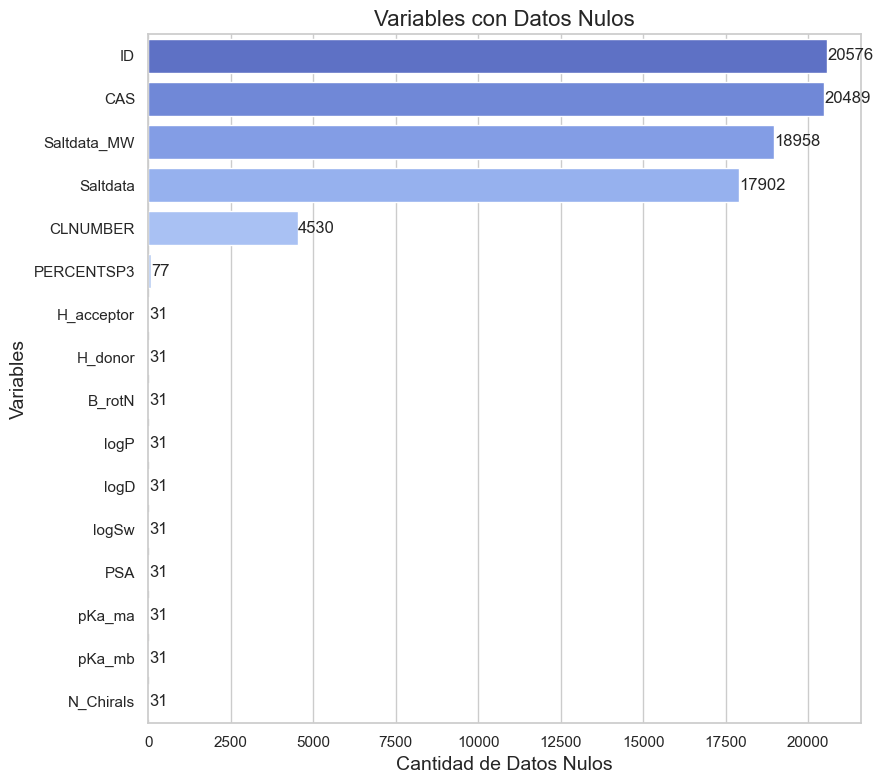

In [3]:

"""
Exploración y Resumen de Propiedades Moleculares.
"""

import numpy as np # type: ignore


# Número de filas y columnas
num_rows, num_columns = Data1.shape
print(f"Dimensiones del conjunto de datos: {num_rows} filas x {num_columns} columnas\n")

# Tipos de datos de las variables
data_types = Data1.dtypes
print("\nTipos de datos de las variables:")
for column, dtype in data_types.items():
    print(f" - {column}: {dtype}")

import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
import warnings

# Suprimir advertencias futuras
warnings.simplefilter(action='ignore', category=FutureWarning)

# Configurar estilo de Seaborn
sns.set(style="whitegrid")

# Contar los datos nulos por variable
missing_data = Data1.isnull().sum()

# Filtrar para mostrar solo las variables que tienen datos nulos
missing_data = missing_data[missing_data > 0]

# Ordenar los datos nulos en orden descendente
missing_data = missing_data.sort_values(ascending=False)

# Visualizar los datos nulos en forma de gráfico de barras horizontales
plt.figure(figsize=(9, 8))  

# Cambiar la paleta a tonos de azul y rojos bajos, con más colores
palette = sns.color_palette("coolwarm", len(missing_data))  

sns.barplot(x=missing_data.values, y=missing_data.index, palette=palette, orient='h')
plt.title('Variables con Datos Nulos', fontsize=16)
plt.xlabel('Cantidad de Datos Nulos', fontsize=14)
plt.ylabel('Variables', fontsize=14)

# Agregar el texto con la cantidad de datos nulos en cada barra
for index, value in enumerate(missing_data):
    plt.text(value + 0.5, index, str(value), ha='left', va='center', fontsize=12)

plt.tight_layout()
plt.show()

In [4]:
import pandas as pd  # type: ignore
from rdkit import Chem, RDLogger  # type: ignore
from chembl_structure_pipeline.standardizer import (  # type: ignore
    get_parent_mol, update_mol_valences, kekulize_mol, flatten_tartrate_mol,
    normalize_mol, uncharge_mol, cleanup_drawing_mol)
from tqdm import tqdm  # type: ignore

# Suprimir mensajes de RDKit
RDLogger.DisableLog('rdApp.*')

"""
Descripción sobre el uso de chembl_structure_pipeline:

El módulo 'chembl_structure_pipeline' se utiliza para estandarizar estructuras moleculares
representadas en formato SMILES. La estandarización es un paso crucial en el análisis químico,
ya que garantiza que las representaciones moleculares sean consistentes y comparables.

Las funciones específicas utilizadas en este código son:

- get_parent_mol: Esta función obtiene la estructura parental de una molécula, eliminando grupos funcionales no esenciales.
- update_mol_valences: Ajusta las valencias de los átomos en la molécula para asegurar que sean químicamente correctas.
- kekulize_mol: Convierte estructuras aromáticas a su forma Kekulé, asegurando que los enlaces sean representados correctamente.
- flatten_tartrate_mol: Aplana estructuras complejas de tartratos a una forma más simple.
- normalize_mol: Normaliza la estructura molecular para asegurar consistencia en la representación.
- uncharge_mol: Elimina cargas formales de los átomos en la molécula.
- cleanup_drawing_mol: Limpia la representación visual de la molécula para facilitar su visualización.

En conjunto, estas funciones permiten obtener una representación SMILES estandarizada que es esencial para
realizar análisis químicos precisos y comparativos.
"""

# Funciones de estandarización
def standardize_molecule(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return None
        mol = get_parent_mol(mol)
        mol = update_mol_valences(mol)
        mol = kekulize_mol(mol)
        mol = flatten_tartrate_mol(mol)
        mol = normalize_mol(mol)
        mol = uncharge_mol(mol)
        mol = cleanup_drawing_mol(mol)
        return Chem.MolToSmiles(mol, isomericSmiles=True)
    except Exception:
        return None

# Función para limpiar el DataFrame
def clean_molecules(df):
    problematic_smiles = []

    for idx, row in tqdm(df.iterrows(), total=df.shape[0], desc="Standardizing molecules"):
        smiles = row['SMILES']
        standardized_smiles_str = standardize_molecule(smiles)
        if standardized_smiles_str and standardized_smiles_str != smiles:
            problematic_smiles.append((smiles, standardized_smiles_str))

    problematic_df = pd.DataFrame(problematic_smiles, columns=['Original_SMILES', 'Standardized_SMILES'])
    return problematic_df

# Verificar que el DataFrame esté cargado
try:
    # Usamos el DataFrame ya cargado llamado Data1
    Data1_copy = Data1.copy()  # Crear una copia para evitar alterar el original

    # Limpiar las moléculas con problemas en la copia del DataFrame
    problematic_data = clean_molecules(Data1_copy)
    
    # Validar si hay problemas y almacenar el resultado en una variable
    has_problematic_molecules = not problematic_data.empty

except Exception as e:
    has_problematic_molecules = True  # Si ocurre un error, se considera que hay problemas

# En lugar de imprimir, solo establecer una variable que indique si hay problemas
print(f"Data1 has problematic molecules: {has_problematic_molecules}")

[22:10:36] Initializing Normalizer
Standardizing molecules: 100%|██████████| 20576/20576 [01:32<00:00, 221.82it/s]

Data1 has problematic molecules: False


In [5]:
from rdkit import Chem  # type: ignore
import pandas as pd  # type: ignore

def clasificar_smiles(smiles):
    """
    Clasifica una cadena SMILES en tres categorías:
    - "Canónico": Si el SMILES coincide con su representación canónica.
    - "Isomérico": Si el SMILES coincide con su representación isomérica.
    - "No estándar": Si no coincide con ninguna de las anteriores.
    
    Args:
        smiles (str): Cadena SMILES a clasificar.
        
    Returns:
        str: Tipo de SMILES clasificado.
    """
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return "Inválido"
        
        # Generar SMILES canónico
        can_smiles = Chem.MolToSmiles(mol, isomericSmiles=False, canonical=True)
        
        # Generar SMILES isomérico
        iso_smiles = Chem.MolToSmiles(mol, isomericSmiles=True, canonical=True)
        
        # Clasificación de SMILES
        if smiles == can_smiles:
            return "Canónico"
        elif smiles == iso_smiles:
            return "Isomérico"
        else:
            return "No estándar"  # Para otros casos que no sean canónicos o isoméricos
    except Exception:
        return "Inválido"  # Manejo de errores en caso de un SMILES inválido

# Verificar la cantidad inicial de SMILES en el DataFrame
total_smiles_inicial = len(Data1)
print(f"Cantidad inicial de SMILES: {total_smiles_inicial}")

# Aplicar la función para clasificar los SMILES en el DataFrame
Data1['Tipo_SMILES'] = Data1['SMILES'].apply(clasificar_smiles)

# Contar los tipos de SMILES
conteo_tipos = Data1['Tipo_SMILES'].value_counts()

# Calcular el porcentaje de cada tipo de SMILES
porcentaje_tipos = (conteo_tipos / total_smiles_inicial) * 100

# Crear un DataFrame para mostrar la información de manera clara
resultado = pd.DataFrame({
    'Cantidad': conteo_tipos,
    'Porcentaje': porcentaje_tipos
}).reset_index().rename(columns={'index': 'Tipo_SMILES'})

# Mostrar los resultados en forma de tabla
print("\nClasificación de SMILES:")
print(resultado)

# Conclusiones
print("\nConclusiones:")
print(f"Se procesaron un total de {total_smiles_inicial} SMILES.")
print("La clasificación ha permitido identificar las diferentes representaciones como Canónicos e Isoméricos.")

Cantidad inicial de SMILES: 20576

Clasificación de SMILES:
   Tipo_SMILES  Cantidad  Porcentaje
0  No estándar     20233   98.333009
1     Canónico       332    1.613530
2    Isomérico        11    0.053460

Conclusiones:
Se procesaron un total de 20576 SMILES.
La clasificación ha permitido identificar las diferentes representaciones como Canónicos e Isoméricos.


In [6]:
from rdkit import Chem  # type: ignore
import pandas as pd  # type: ignore

def clasificar_smiles(smiles):
    """
    Clasifica una cadena SMILES en tres categorías:
    - "Canónico": Si el SMILES coincide con su representación canónica.
    - "Isomérico": Si el SMILES coincide con su representación isomérica.
    - "No estándar": Si no coincide con ninguna de las anteriores.
    
    Args:
        smiles (str): Cadena SMILES a clasificar.
        
    Returns:
        str: Tipo de SMILES clasificado.
    """
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return "Inválido"
        
        # Generar SMILES canónico
        can_smiles = Chem.MolToSmiles(mol, isomericSmiles=False, canonical=True)
        
        # Generar SMILES isomérico
        iso_smiles = Chem.MolToSmiles(mol, isomericSmiles=True, canonical=True)
        
        # Clasificación de SMILES
        if smiles == can_smiles:
            return "Canónico"
        elif smiles == iso_smiles:
            return "Isomérico"
        else:
            return "No estándar"  # Para otros casos que no sean canónicos o isoméricos
    except Exception:
        return "Inválido"  # Manejo de errores en caso de un SMILES inválido

# Aplicar la función para clasificar los SMILES en el DataFrame
Data1['Tipo_SMILES'] = Data1['SMILES'].apply(clasificar_smiles)

# Filtrar los SMILES que son clasificados como 'No estándar'
no_estandar_df = Data1[Data1['Tipo_SMILES'] == 'No estándar']

# Verificar la cantidad de SMILES No Estándar
cantidad_no_estandar = no_estandar_df.shape[0]
print(f"Cantidad de SMILES No Estándar: {cantidad_no_estandar}")

# Mostrar los primeros 10 ejemplos de SMILES No Estándar
if cantidad_no_estandar > 0:
    print("\nEjemplos de SMILES No Estándar:")
    print(no_estandar_df[['SMILES', 'Tipo_SMILES']].head(10))  # Muestra los primeros 10 ejemplos

# Opcionalmente, puedes guardar estos resultados en un archivo CSV para un análisis más profundo
no_estandar_df.to_csv('smiles_no_estandar.csv', index=False)

Cantidad de SMILES No Estándar: 20233

Ejemplos de SMILES No Estándar:
                                               SMILES  Tipo_SMILES
0          COc(cccc1)c1N1CCN(CC(NCc(cc2)ccc2Cl)=O)CC1  No estándar
2          CC(C)(C)c(cc1)ccc1OC(C)(C)C(N1CCN(C)CC1)=O  No estándar
3                          CN(CC1)CCC1NC(Cc1ccccc1)=O  No estándar
4                    CCCN(CC1)CCC1NC(Nc1cccc(Cl)c1)=O  No estándar
5           Cc1cc(C(N2CCN(Cc(cc3)cc4c3OCO4)CC2)=O)cs1  No estándar
6           CCCc(c(C(NCCN(C)C)=O)c1CC)nn1-c1cccc(F)c1  No estándar
7                      CCCN(CC1)CCC1NC(c(cc1)ccc1F)=O  No estándar
8   CCN(CC1)CCN1C(c1c(C(C)C)n(-c2cccc(F)c2)nc1C(C)...  No estándar
9                CC(C)(C)CC(N1CCN(Cc(cc2)ccc2F)CC1)=O  No estándar
10               CC(C)(C)C(N1CCN(Cc(cc2)ccc2Cl)CC1)=O  No estándar


In [8]:
import pandas as pd
from rdkit import Chem  # type: ignore
import mols2grid

"""
Este script filtra los SMILES clasificados como 'No estándar' para realizar un análisis visual.
Se calculará la longitud de cada SMILES y se visualizarán las estructuras moleculares.
Esto permitirá evaluar la complejidad de las moléculas y observar su distribución,
ayudando a identificar si las cadenas más largas están asociadas con problemas en su clasificación.
"""

# Filtrar los SMILES que son clasificados como 'No estándar'
no_estandar_df = Data1[Data1['Tipo_SMILES'] == 'No estándar'].copy()  

# Convertir SMILES a moléculas RDKit y agregar al DataFrame usando .loc[]
no_estandar_df.loc[:, 'mol'] = no_estandar_df['SMILES'].apply(Chem.MolFromSmiles)

# Seleccionar 40 SMILES aleatorios de los no estándar
muestra_no_estandar = no_estandar_df.sample(n=384, random_state=1)  

# Visualizar usando mols2grid
mols2grid.display(muestra_no_estandar, smiles_col='SMILES', mol_col='mol')


MolGridWidget()

In [9]:
"""Considerando la información proporcionada sobre los registros de CID, nombres IUPAC, y su clasificación como isoméricos o canónicos: 
El análisis de los 7807 SMILES en la base de datos revela que 384 de ellos son clasificados como no estándar, 
lo que indica que no pudieron ser reconocidos como isoméricos o canónicos debido a diversos factores estructurales o de representación. Estos SMILES no estándar incluyen registros detallados
 como el CID, el nombre IUPAC y la clave InChI, lo que proporciona información valiosa sobre su identidad química. Sin embargo, a pesar de contar con esta información, 
 la complejidad estructural y las variaciones en la representación pueden haber impedido su clasificación adecuada. Por ejemplo, se identificaron 4956 moléculas válidas
que atraviesan la barrera hematoencefálica (BBB+) y 2851 que no lo hacen (BBB-), sugiriendo que las características estructurales juegan un papel crucial en su permeabilidad. 
Además, el conteo de combinaciones específicas de elementos químicos en los SMILES muestra la presencia de halógenos y grupos funcionales relevantes, lo que podría influir en sus 
propiedades bioquímicas y farmacológicas. Este estudio destaca la importancia de una representación precisa y estandarizada en la química computacional para facilitar 
el análisis y la predicción de propiedades moleculares. 
"""
import pandas as pd
from collections import Counter

# Concatenar todos los SMILES en una sola cadena
all_smiles = ' '.join(no_estandar_df['SMILES'].dropna())  # Ignorar valores nulos

# Función para contar combinaciones de n caracteres
def count_combinations(text, n):
    return Counter(text[i:i+n] for i in range(len(text) - n + 1))

# Contar combinaciones de 2 y 3 caracteres (bigramas y trigramas)
bigram_counts = count_combinations(all_smiles, 2)
trigram_counts = count_combinations(all_smiles, 3)

# Buscar combinaciones específicas en los conteos
def search_combinations(counter, queries):
    return {query: counter.get(query, 0) for query in queries}

# Combinaciones específicas a buscar
specific_combinations = ['Br', 'Cl', 'F', 'I', 'N+', 'OH']

# Mostrar las combinaciones más comunes
print("Combinaciones de 2 caracteres más comunes:")
for combo, count in bigram_counts.most_common(20):
    print(f'{combo}: {count}')

print("\nCombinaciones de 3 caracteres más comunes:")
for combo, count in trigram_counts.most_common(20):
    print(f'{combo}: {count}')

# Mostrar conteo de combinaciones específicas
print("\nConteo de combinaciones específicas:")
specific_counts = search_combinations(bigram_counts, specific_combinations)
for combo, count in specific_counts.items():
    print(f'{combo}: {count}')

Combinaciones de 2 caracteres más comunes:
cc: 81084
CC: 72885
(C: 48875
c1: 40498
c(: 31160
C(: 29878
)c: 26021
1): 24572
c2: 22870
C1: 22736
)C: 22533
CN: 19132
2): 18735
(c: 17765
C): 17166
 C: 17161
1C: 16842
=O: 16556
1c: 16219
)=: 15886

Combinaciones de 3 caracteres más comunes:
ccc: 40370
CCC: 20596
C(C: 15906
cc1: 15724
CC1: 15406
(CC: 15330
N(C: 15260
)=O: 15038
c1c: 12788
c(C: 12557
C1): 12142
c(c: 11942
(cc: 11517
)CC: 11467
(C): 11327
c1): 11208
CCN: 10508
cc2: 9931
)cc: 9903
cc(: 9825

Conteo de combinaciones específicas:
Br: 773
Cl: 3345
F: 0
I: 0
N+: 0
OH: 0


In [10]:
import pandas as pd # type: ignore
from rdkit import Chem # type: ignore
from rdkit.Chem import AllChem # type: ignore
from chembl_structure_pipeline.standardizer import ( # type: ignore
    get_parent_mol, update_mol_valences, kekulize_mol, normalize_mol, uncharge_mol
)
from chembl_structure_pipeline.exclude_flag import exclude_flag # type: ignore

metal_atoms = {3, 4, 11, 12, 13, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
               29, 30, 31, 32, 34, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
               47, 48, 49, 50, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
               66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
               81, 82, 83, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98,
               99, 100, 101, 102, 103}
heavy_atoms = {21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34,
               37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
               50, 51, 52, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
               65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
               78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90,
               91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102,
               103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
               114, 115, 116, 117, 118}

unwanted_atom_dict = {
    "metal_atoms": metal_atoms,
    "heavy_atoms": heavy_atoms,
}

def skip_problematic_molecules(df, smi_column="SMILES", output_column="SMILES_fixed"):
    for idx, row in df.iterrows():
        try:
            mol = Chem.MolFromSmiles(row[smi_column])
            if mol is not None and mol.GetNumAtoms() != 0:
                df.loc[idx, output_column] = Chem.MolToSmiles(mol, canonical=True)
            else:
                df.loc[idx, output_column] = ""
        except:
            df.loc[idx, output_column] = ""
    
    df = df[df[output_column] != ""]
    return df.reset_index(drop=True)

def filter_restricted_atoms(df, unwanted_atoms="heavy_atoms", smi_column="SMILES_fixed"):
    unwanted_atom_set = unwanted_atom_dict.get(unwanted_atoms)
    for idx, row in df.iterrows():
        if row[smi_column] != "":
            try:
                mol = Chem.MolFromSmiles(row[smi_column])
                atom_list = [atom.GetAtomicNum() for atom in mol.GetAtoms()]
                if not set(atom_list).isdisjoint(unwanted_atom_set):
                    df.loc[idx, smi_column] = ""
            except AttributeError:
                continue
    
    df = df[df[smi_column] != ""]
    return df.reset_index(drop=True)

def handle_solvents_salts(df, smi_column="SMILES_fixed"):
    for idx, row in df.iterrows():
        if row[smi_column] != "":
            mol = Chem.MolFromSmiles(row[smi_column])
            mol_new, _ = get_parent_mol(mol, neutralize=False, check_exclusion=True, verbose=False)
            df.loc[idx, smi_column] = Chem.MolToSmiles(mol_new, canonical=True)
    
    df = df[df[smi_column] != ""]
    return df.reset_index(drop=True)

def standardize_molecules(df, smi_column="SMILES_fixed"):
    for idx, row in df.iterrows():
        if row[smi_column] != "":
            mol = Chem.MolFromSmiles(row[smi_column])
            if not exclude_flag(mol, includeRDKitSanitization=False):
                mol = update_mol_valences(mol)
                mol = kekulize_mol(mol)
                mol = normalize_mol(mol)
                mol = uncharge_mol(mol)
                df.loc[idx, smi_column] = Chem.MolToSmiles(mol, canonical=True)
    
    df = df[df[smi_column] != ""]
    return df.reset_index(drop=True)

def neutralize_charges(smiles):
    reactions = [
        ('[n+;H]', 'n'),
        ('[N+;!H0]', 'N'),
        ('[$([O-]);!$([O-][#7])]', 'O'),
        ('[S-;X1]', 'S'),
        ('[$([N-;X2]S(=O)=O)]', 'N'),
        ('[$([N-;X2][C,N]=C)]', 'N'),
        ('[n-]', '[nH]'),
        ('[$([S-]=O)]', 'S'),
        ('[$([N-]C=O)]', 'N'),
    ]
    reactions = [(Chem.MolFromSmarts(x), Chem.MolFromSmiles(y, False)) for x, y in reactions]
    
    mol = Chem.MolFromSmiles(smiles)
    replaced = False
    for reactant, product in reactions:
        while mol.HasSubstructMatch(reactant):
            replaced = True
            rms = AllChem.ReplaceSubstructs(mol, reactant, product)
            mol = rms[0]
    if replaced:
        return Chem.MolToSmiles(mol, True)
    else:
        return smiles

def neutralize(df, smi_column="SMILES_fixed"):
    df[smi_column] = df[smi_column].apply(neutralize_charges)
    return df

def clean_molecules(df, unwanted_atoms="heavy_atoms"):
    df["SMILES_fixed"] = ""
    df = skip_problematic_molecules(df)
    df = handle_solvents_salts(df)
    df = neutralize(df)
    df = filter_restricted_atoms(df, unwanted_atoms)
    df = standardize_molecules(df)
    df = skip_problematic_molecules(df, smi_column="SMILES_fixed", output_column="SMILES_final")
    
    # Ordenar el resultado (ajuste esto según las columnas de su DataFrame)
    if "BBB+/BBB-" in df.columns and "CID" in df.columns:
        df = df.sort_values(by=["BBB+/BBB-", "SMILES_final", "CID"])
    
    return df

# Asumiendo que Data1 es su DataFrame
Data1 = clean_molecules(Data1)

# Guardar el resultado (ajuste el nombre del archivo según sus necesidades)
Data1.to_excel("Data1_cleaned.xlsx", index=None, engine="openpyxl")

print("Moléculas originales:", len(Data1))
print("Moléculas después de la limpieza:", len(Data1[Data1["SMILES_final"] != ""]))

Moléculas originales: 20576
Moléculas después de la limpieza: 20576


In [11]:
import pandas as pd
from rdkit import Chem

# Función para convertir SMILES a formato isomérico
def convert_to_isomeric_smiles(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            # Convertir a formato isomérico
            return Chem.MolToSmiles(mol, isomericSmiles=True)
        else:
            return ""
    except:
        return ""

# Aplicar la conversión en la columna de SMILES original y actualizar
def standardize_smiles_to_isomeric(df, smi_column="SMILES"):
    df[smi_column] = df[smi_column].apply(convert_to_isomeric_smiles)
    return df

# Ejemplo de uso:
Data1 = standardize_smiles_to_isomeric(Data1, smi_column="SMILES")

# Guardar el resultado en un nuevo archivo si es necesario
Data1.to_excel("Data1_isomeric_cleaned.xlsx", index=None, engine="openpyxl")

print("Estandarización completada. Todas las moléculas ahora están en formato isomérico.")


Estandarización completada. Todas las moléculas ahora están en formato isomérico.


In [12]:
# Verificar el número total de SMILES antes y después de la conversión
total_smiles = len(Data1)  # Número total de SMILES en la base de datos
smiles_vacios = Data1["SMILES"].isnull().sum()  # Cuenta cuántos SMILES están vacíos
smiles_validos = total_smiles - smiles_vacios  # SMILES válidos después de la conversión

# Mostrar la información
print(f"Total de SMILES: {total_smiles}")
print(f"Total de SMILES válidos después de la conversión: {smiles_validos}")
print(f"Total de SMILES vacíos después de la conversión: {smiles_vacios}")

# Si quieres ver los SMILES vacíos o que fallaron en la conversión
smiles_fallidos = Data1[Data1["SMILES"] == ""]
print(f"SMILES fallidos:\n{smiles_fallidos}")


Total de SMILES: 20576
Total de SMILES válidos después de la conversión: 20576
Total de SMILES vacíos después de la conversión: 0
SMILES fallidos:
Empty DataFrame
Columns: [IDNUMBER, available, H_acceptor, H_donor, B_rotN, N_O, logP, logD, logSw, PSA, pKa_ma, pKa_mb, N_Chirals, Name, SMILES, Color, Collection, InChI, InChI Key, PERCENTSP3, Link, STEREO, State, ID, ROMol, CLNUMBER, Saltdata, Saltdata_MW, CAS, Tipo_SMILES, SMILES_fixed, SMILES_final]
Index: []

[0 rows x 32 columns]


In [13]:
# Verificar duplicados en la columna de SMILES
duplicados = Data1[Data1.duplicated(subset=["SMILES"], keep=False)]  # Muestra todos los duplicados

# Contar el número total de duplicados
total_duplicados = Data1.duplicated(subset=["SMILES"]).sum()
total_unicos = len(Data1) - total_duplicados  # Número de SMILES únicos

# Mostrar la información
print(f"Total de SMILES: {len(Data1)}")
print(f"Total de SMILES únicos: {total_unicos}")
print(f"Total de SMILES duplicados: {total_duplicados}")

# ver algunos ejemplos de SMILES duplicados si existen
if not duplicados.empty:
    print("Ejemplos de SMILES duplicados:")
    print(duplicados.head(10))  # Muestra los primeros 10 duplicados
else:
    print("No hay SMILES duplicados.")

Total de SMILES: 20576
Total de SMILES únicos: 20576
Total de SMILES duplicados: 0
No hay SMILES duplicados.


In [14]:
import pandas as pd # type: ignore

def check_nulls(df):
    # Contar los valores nulos en cada columna
    null_counts = df.isnull().sum()
    
    # Filtrar las columnas que tienen valores nulos
    null_columns = null_counts[null_counts > 0]
    
    if len(null_columns) > 0:
        print("Columnas con valores nulos y sus respectivas cantidades:")
        for column, count in null_columns.items():
            print(f"Columna: {column}, Valores nulos: {count}")
    else:
        print("No hay valores nulos en el DataFrame.")

# Verificación de Nulos en el DataFrame Data1
check_nulls(Data1)

Columnas con valores nulos y sus respectivas cantidades:
Columna: H_acceptor, Valores nulos: 31
Columna: H_donor, Valores nulos: 31
Columna: B_rotN, Valores nulos: 31
Columna: logP, Valores nulos: 31
Columna: logD, Valores nulos: 31
Columna: logSw, Valores nulos: 31
Columna: PSA, Valores nulos: 31
Columna: pKa_ma, Valores nulos: 31
Columna: pKa_mb, Valores nulos: 31
Columna: N_Chirals, Valores nulos: 31
Columna: PERCENTSP3, Valores nulos: 77
Columna: ID, Valores nulos: 20576
Columna: CLNUMBER, Valores nulos: 4530
Columna: Saltdata, Valores nulos: 17902
Columna: Saltdata_MW, Valores nulos: 18958
Columna: CAS, Valores nulos: 20489


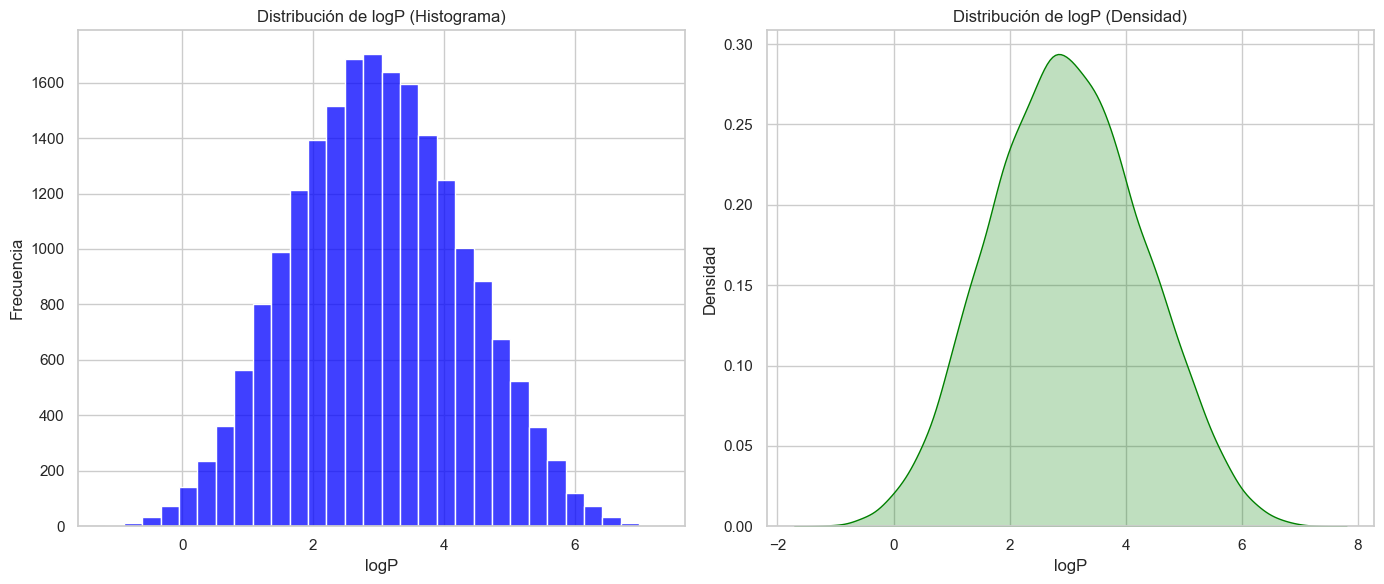

In [17]:
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear una figura con dos subplots
plt.figure(figsize=(14, 6))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(Data1['logP'].dropna(), bins=30, kde=False, color='blue')
plt.title('Distribución de logP (Histograma)')
plt.xlabel('logP')
plt.ylabel('Frecuencia')

# Gráfico de densidad
plt.subplot(1, 2, 2)
sns.kdeplot(Data1['logP'].dropna(), shade=True, color='green')
plt.title('Distribución de logP (Densidad)')
plt.xlabel('logP')
plt.ylabel('Densidad')

# Mostrar los gráficos
plt.tight_layout()

In [20]:
import pandas as pd # type: ignore
from mordred import Calculator, descriptors # type: ignore
from rdkit import Chem # type: ignore
import numpy as np # type: ignore
from tqdm import tqdm # type: ignore
import warnings

# Ignorar advertencias de Runtime
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Inicializar el calculador de Mordred
calc = Calculator(descriptors, ignore_3D=True)

def handle_extreme_values(value, min_value=-1e10, max_value=1e10):
    if value < min_value or value > max_value:
        return np.nan  # O maneja de otra manera
    return value

def validate_molecule(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None, False
    return mol, True

# Función para calcular descriptores desde SMILES
def calculate_descriptors(smiles):
    mol, is_valid = validate_molecule(smiles)
    if not is_valid:
        return pd.Series([None]*len(calc.descriptors), index=[str(desc) for desc in calc.descriptors])
    
    features = calc(mol)
    numeric_features = {str(descriptor): handle_extreme_values(value) for descriptor, value in features.items() if isinstance(value, (int, float))}
    
    # Imprimir valores extremos para diagnóstico
    for descriptor, value in numeric_features.items():
        if np.isnan(value):
            with open("extreme_values_log.txt", "a") as f:
                f.write(f"{smiles}, Descriptor {descriptor} tiene un valor extremo: {value}\n")
    
    return pd.Series(numeric_features)

# Configurar tqdm para mostrar progreso en Pandas
tqdm.pandas(desc="Calculando descriptores")

# Aplicar la función a la columna SMILES de Data1
descriptors_df = Data1['SMILES'].progress_apply(calculate_descriptors)

# Eliminar columnas con cualquier valor faltante
descriptors_df.dropna(axis=1, inplace=True)

# Unir los descriptores con los datos originales
data_with_descriptors = pd.concat([Data1, descriptors_df], axis=1)

print("Descriptores numéricos calculados y guardados en el archivo.")


Calculando descriptores: 100%|██████████| 20576/20576 [35:42<00:00,  9.60it/s]

Descriptores numéricos calculados y guardados en el archivo.


In [21]:
# Verificar el número de filas y columnas del DataFrame final
print(f"El DataFrame tiene {data_with_descriptors.shape[0]} filas y {data_with_descriptors.shape[1]} columnas.")

El DataFrame tiene 20576 filas y 1406 columnas.


In [22]:
# Verificar si hay columnas con valores nulos
missing_values = data_with_descriptors.isnull().sum()
if missing_values.any():
    print("Columnas con valores nulos:")
    print(missing_values[missing_values > 0])
else:
    print("No hay columnas con valores nulos.")

Columnas con valores nulos:
H_acceptor        31
H_donor           31
B_rotN            31
logP              31
logD              31
logSw             31
PSA               31
pKa_ma            31
pKa_mb            31
N_Chirals         31
PERCENTSP3        77
ID             20576
CLNUMBER        4530
Saltdata       17902
Saltdata_MW    18958
CAS            20489
dtype: int64


In [23]:
from mordred import Calculator, descriptors

# Inicializar el calculador de Mordred
calc = Calculator(descriptors)

# Obtener los nombres de todos los descriptores y su categoría
descriptor_dict = {}
for desc in calc.descriptors:
    descriptor_name = str(desc)
    descriptor_category = desc.__class__.__bases__[0].__name__  # Obtener la categoría
    descriptor_dict[descriptor_name] = descriptor_category

# Crear un diccionario para contar cuántos descriptores hay por categoría
category_count = {}
for descriptor_name, category in descriptor_dict.items():
    if category not in category_count:
        category_count[category] = 0
    category_count[category] += 1

# Mostrar los nombres de descriptores organizados por su categoría
for category, count in category_count.items():
    print(f"Categoría: {category} - {count} descriptores")
    descriptors_in_category = [d for d, c in descriptor_dict.items() if c == category]
    print(f"Descriptores: {descriptors_in_category}\n")


Categoría: ABCIndexBase - 2 descriptores
Descriptores: ['ABC', 'ABCGG']

Categoría: SmartsCountBase - 2 descriptores
Descriptores: ['nAcid', 'nBase']

Categoría: Descriptor - 305 descriptores
Descriptores: ['SpAbs_A', 'SpMax_A', 'SpDiam_A', 'SpAD_A', 'SpMAD_A', 'LogEE_A', 'VE1_A', 'VE2_A', 'VE3_A', 'VR1_A', 'VR2_A', 'VR3_A', 'nAtom', 'nHeavyAtom', 'nSpiro', 'nBridgehead', 'nHetero', 'nH', 'nB', 'nC', 'nN', 'nO', 'nS', 'nP', 'nF', 'nCl', 'nBr', 'nI', 'nX', 'BalabanJ', 'BertzCT', 'nBonds', 'nBondsO', 'nBondsS', 'nBondsD', 'nBondsT', 'nBondsA', 'nBondsM', 'nBondsKS', 'nBondsKD', 'FCSP3', 'SZ', 'Sm', 'Sv', 'Sse', 'Spe', 'Sare', 'Sp', 'Si', 'SpAbs_D', 'SpMax_D', 'SpDiam_D', 'SpAD_D', 'SpMAD_D', 'LogEE_D', 'VE1_D', 'VE2_D', 'VE3_D', 'VR1_D', 'VR2_D', 'VR3_D', 'ECIndex', 'fragCpx', 'fMF', 'GRAV', 'GRAVH', 'GRAVp', 'GRAVHp', 'FilterItLogS', 'VMcGowan', 'Mor01', 'Mor02', 'Mor03', 'Mor04', 'Mor05', 'Mor06', 'Mor07', 'Mor08', 'Mor09', 'Mor10', 'Mor11', 'Mor12', 'Mor13', 'Mor14', 'Mor15', 'Mor16',

In [24]:
from mordred import Calculator, descriptors

# Inicializar el calculador de Mordred
calc = Calculator(descriptors)

# Obtener los nombres de todos los descriptores y su categoría
descriptor_dict = {}
for desc in calc.descriptors:
    descriptor_name = str(desc)
    descriptor_category = desc.__class__.__bases__[0].__name__  # Obtener la categoría
    descriptor_dict[descriptor_name] = descriptor_category

# Crear un diccionario para contar cuántos descriptores hay por categoría
category_count = {}
for category in descriptor_dict.values():
    if category not in category_count:
        category_count[category] = 0
    category_count[category] += 1

# Mostrar solo las categorías y el conteo
for category, count in category_count.items():
    print(f"Categoría: {category} - {count} descriptores")

Categoría: ABCIndexBase - 2 descriptores
Categoría: SmartsCountBase - 2 descriptores
Categoría: Descriptor - 305 descriptores
Categoría: AromaticBase - 2 descriptores
Categoría: AutocorrelationBase - 303 descriptores
Categoría: ATS - 99 descriptores
Categoría: ATSC - 108 descriptores
Categoría: MATS - 96 descriptores
Categoría: BCUTBase - 24 descriptores
Categoría: BaryszMatrixBase - 104 descriptores
Categoría: VersionCPSABase - 15 descriptores
Categoría: PNSA - 5 descriptores
Categoría: FNSA - 10 descriptores
Categoría: FPSA - 5 descriptores
Categoría: CPSABase - 4 descriptores
Categoría: RNCG - 1 descriptores
Categoría: RNCS - 1 descriptores
Categoría: TASA - 1 descriptores
Categoría: RASA - 1 descriptores
Categoría: CarbonTypesBase - 10 descriptores
Categoría: ChiBase - 56 descriptores
Categoría: ConstitutionalSum - 8 descriptores
Categoría: DetourMatrixBase - 14 descriptores
Categoría: EStateBase - 316 descriptores
Categoría: EtaBase - 45 descriptores
Categoría: GeometricalIndexBas

In [25]:
import pandas as pd # type: ignore
import os

# Asegúrate de que la carpeta 'nuevo' exista en tu escritorio
folder_path = os.path.expanduser("~/Desktop/nuevo")

# Crear la carpeta si no existe
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Ruta completa del archivo CSV
file_path = os.path.join(folder_path, "Validacion.csv")

# Guardar el DataFrame con descriptores en el archivo CSV
data_with_descriptors.to_csv(file_path, index=False)

print(f"Archivo guardado en: {file_path}")

Archivo guardado en: C:\Users\USUARIO/Desktop/nuevo\Validacion.csv


In [18]:
import pandas as pd
from IPython.display import display

# Ruta al archivo CSV
file_path = r'C:\Users\USUARIO\Desktop\nuevo\Validacion.csv'

# Cargar el archivo CSV en un DataFrame, usando low_memory=False
df = pd.read_csv(file_path, low_memory=False)

# Mostrar las primeras filas del DataFrame con un formato agradable
display(df.head())

,IDNUMBER,available,H_acceptor,H_donor,B_rotN,N_O,logP,logD,logSw,PSA,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,Y206-1106,12,4.0,1.0,7.0,5,3.4973,3.4963,-3.8826,39.0320,...,9.961143,60.485395,373.155705,7.463114,2032,37,130.0,148.0,7.777778,5.888889
1,J075-2731,154,6.0,0.0,5.0,6,2.9585,2.9585,-3.3631,53.0950,...,10.094149,75.588751,382.119654,8.306949,2187,39,142.0,165.0,7.138889,5.916667
2,Y207-2956,2,4.0,0.0,5.0,4,3.6317,3.2136,-3.6905,26.5828,...,10.077819,57.469522,318.230728,6.004353,1294,35,120.0,137.0,9.930556,4.819444
3,Y207-2769,6,3.0,1.0,4.0,3,0.9625,-1.5716,-1.5751,27.6402,...,9.348100,48.915685,232.157563,6.274529,592,20,82.0,90.0,5.194444,3.833333
4,Y206-2535,18,3.0,2.0,6.0,4,3.2551,0.9241,-3.6286,37.3790,...,9.540579,52.754825,295.145140,7.027265,961,25,96.0,106.0,6.555556,4.583333


In [20]:
print(df.isnull().sum())


IDNUMBER      0
available     0
H_acceptor    0
H_donor       0
B_rotN        0
             ..
WPol          0
Zagreb1       0
Zagreb2       0
mZagreb1      0
mZagreb2      0
Length: 1406, dtype: int64


In [27]:
# Verificar columnas duplicadas
def find_duplicate_columns(df):
    # Obtener nombres de columnas duplicados
    duplicates = df.columns[df.columns.duplicated()]
    
    if len(duplicates) > 0:
        print("Columnas duplicadas encontradas:")
        for column in duplicates:
            print(f"- {column}")
    else:
        print("No se encontraron columnas duplicadas.")

# Llamar a la función para verificar columnas duplicadas en el DataFrame ya cargado
find_duplicate_columns(df)

No se encontraron columnas duplicadas.


In [28]:
# Obtener el tipo de datos de cada columna
tipos_datos = df.dtypes

# Contar el número de columnas numéricas y categóricas
num_numericos = sum(tipos_datos.apply(lambda x: pd.api.types.is_numeric_dtype(x)))
num_categoricos = sum(tipos_datos.apply(lambda x: isinstance(x, pd.CategoricalDtype) or pd.api.types.is_object_dtype(x)))

# Mostrar los resultados
print(f"Cantidad de columnas numéricas: {num_numericos}")
print(f"Cantidad de columnas categóricas: {num_categoricos}")

Cantidad de columnas numéricas: 1389
Cantidad de columnas categóricas: 17


In [29]:
import pandas as pd

# Mostrar las columnas categóricas ('object')
categorical_columns = df.select_dtypes(include=['object']).columns

# Imprimir las columnas categóricas
print("Columnas categóricas:")
for col in categorical_columns:
    print(col)

Columnas categóricas:
IDNUMBER
Name
SMILES
Color
Collection
InChI
InChI Key
Link
STEREO
State
ROMol
CLNUMBER
Saltdata
CAS
Tipo_SMILES
SMILES_fixed
SMILES_final


In [30]:
# Identificar columnas con datos nulos
missing_data = df.isnull().sum()

# Filtrar solo las columnas con datos nulos
missing_data = missing_data[missing_data > 0]

# Mostrar las columnas con datos nulos y la cantidad de datos nulos
print("Columnas con datos nulos y la cantidad de datos nulos:")
print(missing_data)

# Opcional: Imprimir también el porcentaje de datos nulos por columna
percentage_missing = (missing_data / len(df)) * 100
print("\nPorcentaje de datos nulos por columna:")
print(percentage_missing)

Columnas con datos nulos y la cantidad de datos nulos:
H_acceptor        31
H_donor           31
B_rotN            31
logP              31
logD              31
logSw             31
PSA               31
pKa_ma            31
pKa_mb            31
N_Chirals         31
PERCENTSP3        77
ID             20576
CLNUMBER        4530
Saltdata       17902
Saltdata_MW    18958
CAS            20489
dtype: int64

Porcentaje de datos nulos por columna:
H_acceptor       0.150661
H_donor          0.150661
B_rotN           0.150661
logP             0.150661
logD             0.150661
logSw            0.150661
PSA              0.150661
pKa_ma           0.150661
pKa_mb           0.150661
N_Chirals        0.150661
PERCENTSP3       0.374222
ID             100.000000
CLNUMBER        22.015941
Saltdata        87.004277
Saltdata_MW     92.136470
CAS             99.577177
dtype: float64


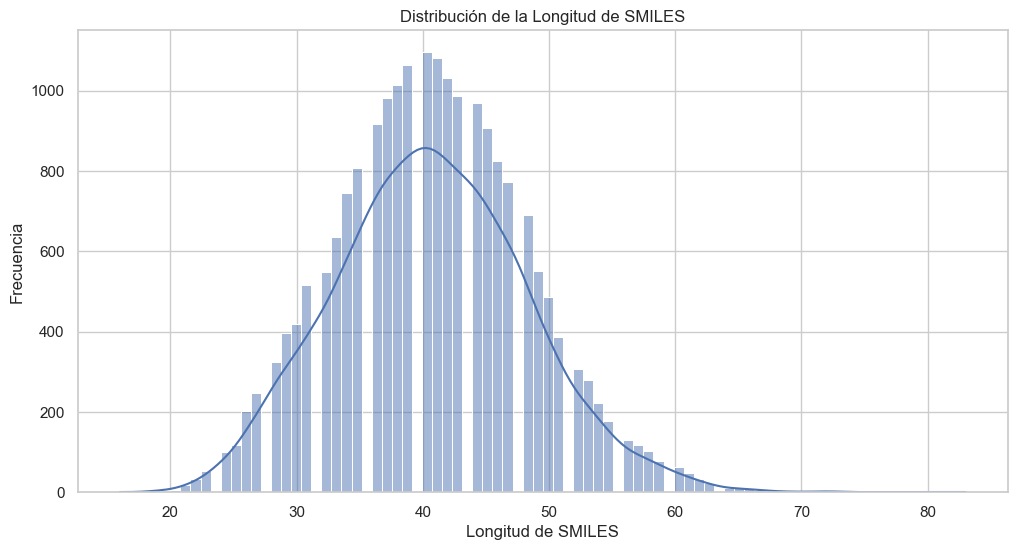

Estadísticas descriptivas para SMILES:
count    20576.000000
mean        40.694304
std          7.656099
min         16.000000
25%         35.000000
50%         41.000000
75%         46.000000
max         83.000000
Name: SMILES_length, dtype: float64


In [33]:
import pandas as pd  # type: ignore
from scipy import stats  # type: ignore
import seaborn as sns  # type: ignore
import matplotlib.pyplot as plt  # type: ignore

# Paso 1: Añadir Columna de Longitud para SMILES
df['SMILES_length'] = df['SMILES'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

# Paso 2: Visualizar la Distribución de la Longitud de SMILES
sns.set(style="whitegrid")

# Crear un gráfico de distribución para SMILES
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='SMILES_length', kde=True)
plt.title("Distribución de la Longitud de SMILES")
plt.xlabel("Longitud de SMILES")
plt.ylabel("Frecuencia")
plt.show()

# Calcular estadísticas descriptivas para SMILES
length_stats_smiles = df['SMILES_length'].describe()
print("Estadísticas descriptivas para SMILES:")
print(length_stats_smiles)


Estadísticas descriptivas de simetría:
count    20576.000000
mean         3.331308
std          0.834332
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: Symmetry, dtype: float64


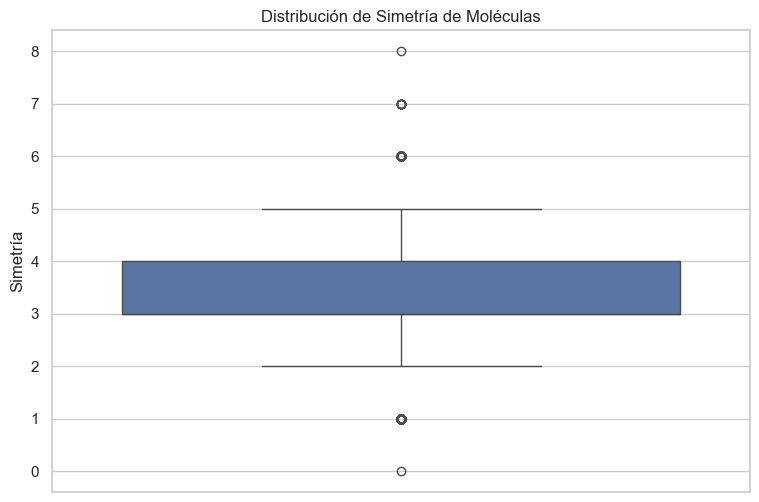

In [34]:
import pandas as pd
from rdkit import Chem  # Importar Chem de rdkit
from rdkit.Chem import rdMolDescriptors  # Importar los descriptores moleculares
import matplotlib.pyplot as plt
import seaborn as sns

# Función para calcular la simetría de una molécula
def calculate_symmetry(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        # Calcular la simetría basada en el número de anillos como proxy
        symmetry = rdMolDescriptors.CalcNumRings(mol)
        return symmetry
    return None

# Aplicar la función a cada SMILES
df['Symmetry'] = df['SMILES'].apply(calculate_symmetry)

# Estadísticas descriptivas de simetría
symmetry_stats = df['Symmetry'].describe()

# Mostrar resultados
print("Estadísticas descriptivas de simetría:")
print(symmetry_stats)

# Visualización de la distribución de simetría
plt.figure(figsize=(9, 6))
sns.boxplot(y='Symmetry', data=df)
plt.title('Distribución de Simetría de Moléculas')
plt.ylabel('Simetría')
plt.show()


Número de moléculas quirales:
Is_Chiral
False    12079
True      8497
Name: count, dtype: int64

Porcentaje de moléculas quirales:
Is_Chiral
False    58.704316
True     41.295684
Name: count, dtype: float64


Text(0.5, 0, '¿Es Quiral?')

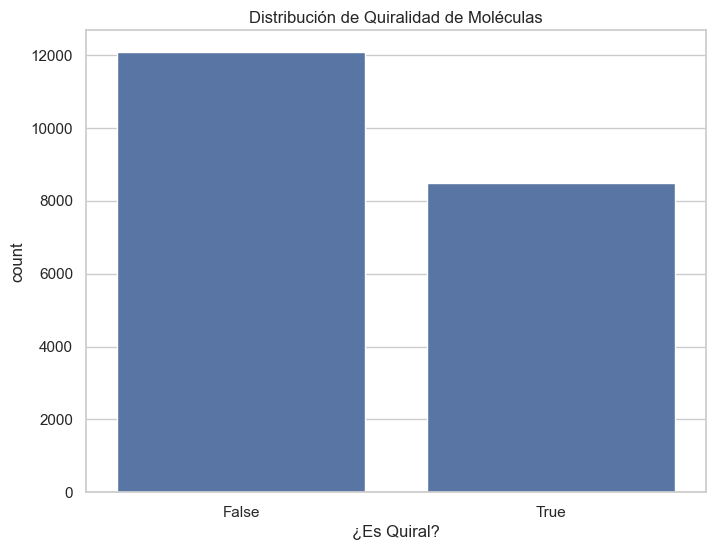

In [35]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
import matplotlib.pyplot as plt

# Función para determinar la quiralidad de una molécula
def is_chiral(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return mol is not None and any(atom.HasProp('_ChiralityPossible') for atom in mol.GetAtoms())

# Aplicar la función y crear una columna 'Is_Chiral'
df['Is_Chiral'] = df['SMILES'].apply(is_chiral)

# Contar el número total de moléculas quirales
chiral_counts = df['Is_Chiral'].value_counts()

# Calcular el porcentaje de moléculas quirales
total_count = len(df)
chiral_percentage = (chiral_counts / total_count) * 100

# Mostrar resultados
print("Número de moléculas quirales:")
print(chiral_counts)
print("\nPorcentaje de moléculas quirales:")
print(chiral_percentage)

# Visualización de la distribución de quiralidad
plt.figure(figsize=(8, 6))
sns.countplot(x='Is_Chiral', data=df)
plt.title('Distribución de Quiralidad de Moléculas')
plt.xlabel('¿Es Quiral?')


In [36]:
import pandas as pd

# Supongamos que df es tu DataFrame original
quirales = df[df['Is_Chiral'] == True]
no_quirales = df[df['Is_Chiral'] == False]

# Contar cuántas moléculas en cada grupo (quirales y no quirales)
total_quirales = quirales.shape[0]
total_no_quirales = no_quirales.shape[0]

# Crear un resumen de diferencias y similitudes
diferencias = {
    "Diferencias": [
        f"Total de moléculas quirales: {total_quirales}",
        f"Total de moléculas no quirales: {total_no_quirales}"
    ]
}

similitudes = {
    "Similitudes": [
        f"Ambos grupos tienen un mínimo de 0 en logBB.",
        f"Ambos grupos incluyen compuestos con estructuras complejas.",
        f"Ambos grupos pueden tener SMILES isoméricos.",
        f"Ambos grupos pueden contener heteroátomos como N, O, S.",
        f"Ambos grupos pueden ser utilizados en estudios farmacológicos."
    ]
}

# Mostrar resultados
print("Diferencias:")
for diff in diferencias["Diferencias"]:
    print(diff)

print("\nSimilitudes:")
for sim in similitudes["Similitudes"]:
    print(sim)


Diferencias:
Total de moléculas quirales: 8497
Total de moléculas no quirales: 12079

Similitudes:
Ambos grupos tienen un mínimo de 0 en logBB.
Ambos grupos incluyen compuestos con estructuras complejas.
Ambos grupos pueden tener SMILES isoméricos.
Ambos grupos pueden contener heteroátomos como N, O, S.
Ambos grupos pueden ser utilizados en estudios farmacológicos.


In [37]:
import pandas as pd
from collections import Counter

# Concatenar todos los SMILES en una sola cadena
all_smiles = ' '.join(df['SMILES'].dropna())

# Contar combinaciones de 2 y 3 caracteres
def count_combinations(text, n):
    return Counter(text[i:i+n] for i in range(len(text) - n + 1))

# Contar combinaciones de 2 y 3 caracteres
bigram_counts = count_combinations(all_smiles, 2)
trigram_counts = count_combinations(all_smiles, 3)

# Buscar combinaciones específicas
def search_combinations(counter, queries):
    return {query: counter.get(query, 0) for query in queries}

# Combinaciones específicas a buscar
specific_combinations = ['Br', 'Cl', 'F', 'I', 'N+', 'OH']

# Mostrar las combinaciones más comunes
print("Combinaciones de 2 caracteres más comunes:")
for combo, count in bigram_counts.most_common(20):
    print(f'{combo}: {count}')

print("\nCombinaciones de 3 caracteres más comunes:")
for combo, count in trigram_counts.most_common(20):
    print(f'{combo}: {count}')

# Mostrar conteo de combinaciones específicas
print("\nConteo de combinaciones específicas:")
specific_counts = search_combinations(bigram_counts, specific_combinations)
for combo, count in specific_counts.items():
    print(f'{combo}: {count}')

Combinaciones de 2 caracteres más comunes:
cc: 91781
CC: 74437
(C: 38271
c1: 31534
C(: 28072
)C: 28023
c(: 25271
c2: 23009
)c: 22414
CN: 19638
1c: 17294
 C: 17180
O): 17135
C): 16891
1C: 16845
=O: 16439
1 : 16409
(=: 15681
C1: 15612
2): 15561

Combinaciones de 3 caracteres más comunes:
ccc: 50551
CCC: 22550
=O): 16191
(=O: 15672
cc(: 15561
c1c: 15388
C(=: 15205
c(C: 14281
1cc: 13913
1 C: 13659
N(C: 12848
)CC: 12379
CCN: 11963
CN(: 11857
(C): 11652
c2c: 11456
1CC: 10886
2cc: 9870
CC1: 9421
CC(: 9281

Conteo de combinaciones específicas:
Br: 782
Cl: 3390
F: 0
I: 0
N+: 0
OH: 0


In [38]:
import pandas as pd
from collections import Counter

# Concatenar todos los SMILES en una sola cadena
all_smiles = ' '.join(df['SMILES'].dropna())

# Contar combinaciones de 2 y 3 caracteres
def count_combinations(text, n):
    return Counter(text[i:i+n] for i in range(len(text) - n + 1))

# Contar combinaciones para todos los SMILES
bigram_counts = count_combinations(all_smiles, 2)
trigram_counts = count_combinations(all_smiles, 3)

# Obtener las 30 combinaciones más comunes
top_bigrams = bigram_counts.most_common(30)
top_trigrams = trigram_counts.most_common(30)

# Mostrar resultados
print("Las 30 combinaciones más comunes de bigramas:")
for bigram, count in top_bigrams:
    print(f"{bigram}: {count}")

print("\nLas 30 combinaciones más comunes de trigramas:")
for trigram, count in top_trigrams:
    print(f"{trigram}: {count}")


Las 30 combinaciones más comunes de bigramas:
cc: 91781
CC: 74437
(C: 38271
c1: 31534
C(: 28072
)C: 28023
c(: 25271
c2: 23009
)c: 22414
CN: 19638
1c: 17294
 C: 17180
O): 17135
C): 16891
1C: 16845
=O: 16439
1 : 16409
(=: 15681
C1: 15612
2): 15561
Cc: 14830
N(: 14005
C2: 13983
2c: 12750
2C: 11811
c3: 11719
nc: 11478
)N: 11363
CO: 8491
3): 7544

Las 30 combinaciones más comunes de trigramas:
ccc: 50551
CCC: 22550
=O): 16191
(=O: 15672
cc(: 15561
c1c: 15388
C(=: 15205
c(C: 14281
1cc: 13913
1 C: 13659
N(C: 12848
)CC: 12379
CCN: 11963
CN(: 11857
(C): 11652
c2c: 11456
1CC: 10886
2cc: 9870
CC1: 9421
CC(: 9281
Cc1: 9212
)cc: 8674
(C(: 8464
cc1: 8424
2CC: 8409
CC2: 8343
O)N: 7979
C2): 7674
C1 : 7617
cc2: 7533


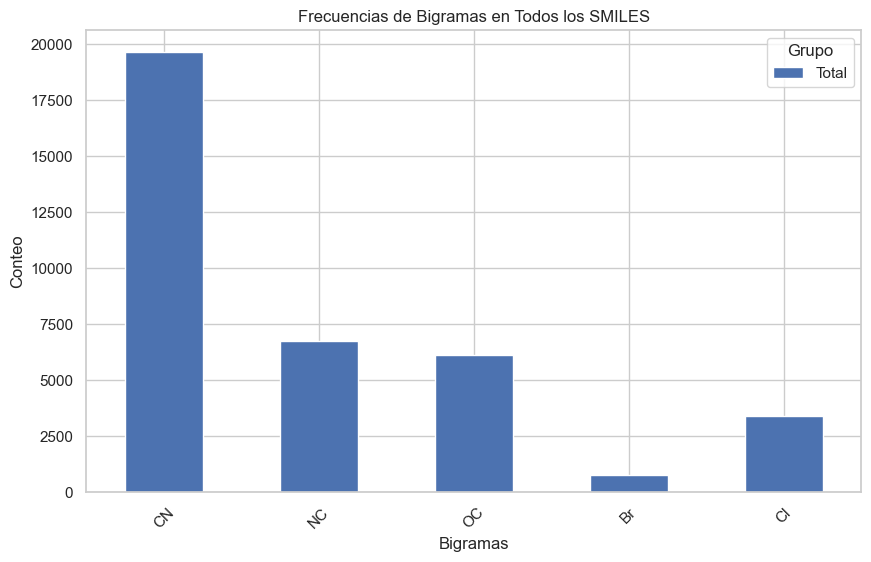

In [39]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Concatenar todos los SMILES en una sola cadena
all_smiles = ' '.join(df['SMILES'].dropna())

# Contar combinaciones de 2 caracteres (bigramas)
def count_combinations(text, n):
    return Counter(text[i:i+n] for i in range(len(text) - n + 1))

# Contar bigramas para todos los SMILES
bigram_counts = count_combinations(all_smiles, 2)

# Seleccionar 5 bigramas específicos para análisis
diferencias_seleccionadas = ['CN', 'NC', 'OC', 'Br', 'Cl']

# Contar las frecuencias de estas diferencias en el grupo total
frecuencias = {
    'Bigram': [],
    'Count': []
}

for diferencia in diferencias_seleccionadas:
    frecuencias['Bigram'].append(diferencia)
    frecuencias['Count'].append(bigram_counts.get(diferencia, 0))

# Convertir a DataFrame
frecuencias_df = pd.DataFrame(frecuencias)

# Graficar
frecuencias_df.set_index('Bigram').plot(kind='bar', figsize=(10, 6))
plt.title('Frecuencias de Bigramas en Todos los SMILES')
plt.xlabel('Bigramas')
plt.ylabel('Conteo')
plt.xticks(rotation=45)
plt.legend(title='Grupo', labels=['Total'])
plt.show()


Estadísticas descriptivas de polaridad:
count    20576.000000
mean         3.218850
std          1.055414
min         -0.582980
25%          2.478975
50%          3.193600
75%          3.950110
max          6.998200
Name: Polarity, dtype: float64


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_20796\208397202.py:32: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='Polarity', bins=30, palette='pastel', kde=True)


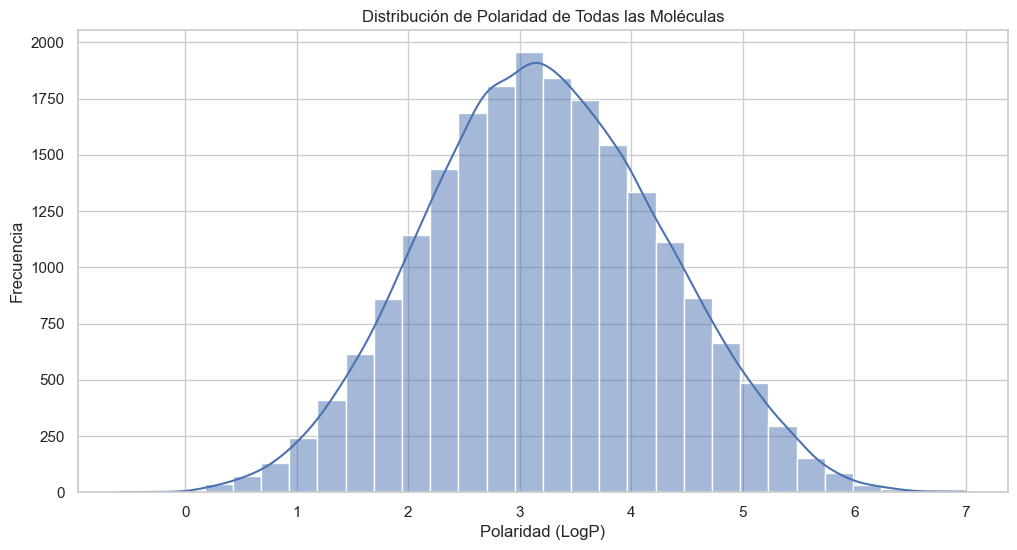

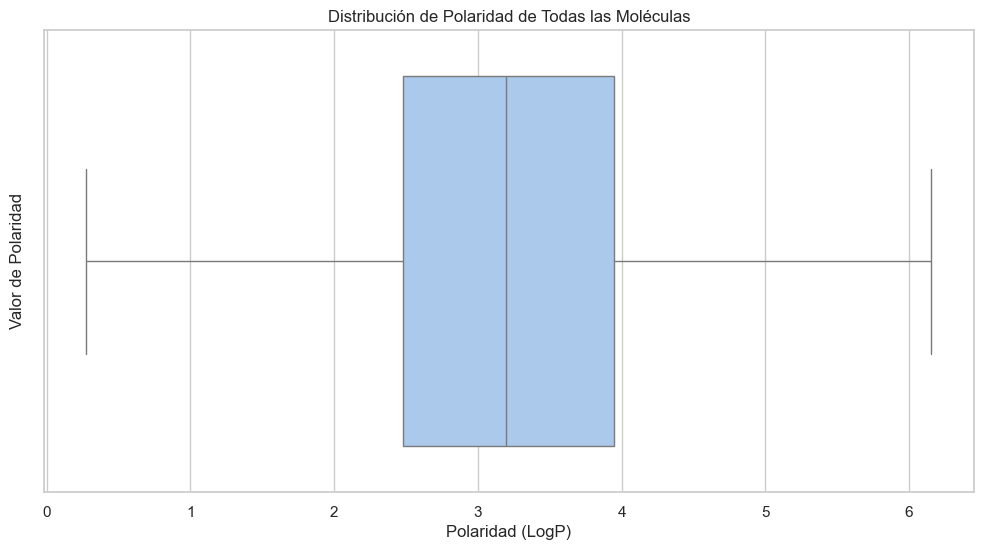

In [40]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Verificar que df contenga la columna necesaria
if 'SMILES' not in df.columns:
    raise ValueError("El DataFrame no contiene la columna 'SMILES'")

# Función para calcular la polaridad (momento dipolar) de una molécula
def calculate_polarity(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return Descriptors.MolLogP(mol)  # Aquí usamos el LogP como proxy de polaridad
    return None

# Aplicar la función a cada SMILES
df['Polarity'] = df['SMILES'].apply(calculate_polarity)

# Estadísticas descriptivas de polaridad
polar_stats = df['Polarity'].describe()

# Mostrar estadísticas descriptivas
print("Estadísticas descriptivas de polaridad:")
print(polar_stats)

# Visualización de la distribución de polaridad
plt.figure(figsize=(12, 6))

# Histograma de polaridad
sns.histplot(data=df, x='Polarity', bins=30, palette='pastel', kde=True)
plt.title('Distribución de Polaridad de Todas las Moléculas')
plt.xlabel('Polaridad (LogP)')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 6))

# Boxplot de polaridad
sns.boxplot(x='Polarity', data=df, palette='pastel', showfliers=False)
plt.title('Distribución de Polaridad de Todas las Moléculas')
plt.xlabel('Polaridad (LogP)')
plt.ylabel('Valor de Polaridad')
plt.show()


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display

# Ruta al archivo CSV
file_path = r'C:\Users\USUARIO\Desktop\nuevo\BDFINAL.csv'

# Cargar el archivo CSV en un DataFrame, usando low_memory=False
df = pd.read_csv(file_path, low_memory=False)

# Mostrar las primeras filas del DataFrame con un formato agradable
display(df.head())

class PreparacionBHE:
    def __init__(self, df):
        self.df = df
        self.scaler = StandardScaler()
    
    def seleccionar_descriptores_relevantes(self, k=20):
        # Seleccionar descriptores potencialmente relevantes para la BHE
        descriptores_potenciales = [
            'ECIndex', 'ATSC1c', 'NtCH', 'AATS0Z', 'SssssC', 'nHetero', 'Radius', 'ATS8i'
        ]
        
        # Asegurarse de que todos los descriptores estén presentes en el DataFrame
        descriptores_disponibles = [d for d in descriptores_potenciales if d in self.df.columns]
        
        # Usar SelectKBest para elegir los k mejores descriptores
        X = self.df[descriptores_disponibles]
        y = self.df['LogP'].dropna()  # Omitir nulos en logBB
        
        # Asegurarse de que X esté alineado con y después de eliminar nulos
        X = X.loc[y.index]
        
        selector = SelectKBest(score_func=f_regression, k=k)
        selector.fit(X, y)
        
        descriptores_seleccionados = X.columns[selector.get_support()].tolist()
        
        return descriptores_seleccionados
    
    def calcular_probabilidad_bhe(self, descriptores):
        X = self.df[descriptores].dropna()  # Omitir nulos en los descriptores
        
        # Normalizar los datos
        X_scaled = self.scaler.fit_transform(X)
        
        # Definir los umbrales para cada descriptor (estos son ejemplos y deben ajustarse)
        umbrales = {
            'LogP': 2.0,       # Valores mayores indican mejor penetración de BHE
            'nHBAcc': 3,       # Menos aceptores de enlaces de hidrógeno es mejor
            'nHBDon': 2,       # Menos donadores de enlaces de hidrógeno es mejor
            'MW': 400,         # Peso molecular menor es mejor
            'TopoPSA': 90,     # Área de superficie polar topológica menor es mejor
            'nRotB': 5,        # Menos enlaces rotables es mejor
        
        }
        
        # Calcular la probabilidad de atravesar la BHE
        probabilidades = []
        for _, row in X.iterrows():
            condiciones_cumplidas = 0
            for desc in descriptores:
                if desc in umbrales:
                    if desc == 'LogP':
                        condiciones_cumplidas += 1 if row[desc] >= umbrales[desc] else 0
                    else:
                        condiciones_cumplidas += 1 if row[desc] <= umbrales[desc] else 0
                else:
                    # Para descriptores sin umbral definido, asumimos que valores más bajos son mejores
                    condiciones_cumplidas += 1 if row[desc] <= X[desc].median() else 0
            
            prob = condiciones_cumplidas / len(descriptores)
            probabilidades.append(prob)
        
        return np.array(probabilidades)

    def preparar_datos_modelo(self):
        descriptores = self.seleccionar_descriptores_relevantes()
        
        # Calcular la probabilidad de atravesar la BHE
        y = self.calcular_probabilidad_bhe(descriptores)
        
        # Usar los descriptores seleccionados como variables predictoras
        X = self.df[descriptores].dropna()  # Omitir nulos en los descriptores
        y = y[~np.isnan(y)]  # Omitir nulos en las probabilidades
        
        # Dividir en conjuntos de entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        return X_train, X_test, y_train, y_test, descriptores

    def entrenar_modelo(self):
        X_train, X_test, y_train, y_test, descriptores = self.preparar_datos_modelo()
        
        # Entrenar un modelo de regresión
        modelo = LinearRegression()
        modelo.fit(X_train, y_train)
        
        # Predecir en el conjunto de prueba
        y_pred = modelo.predict(X_test)
        
        # Calcular métricas de evaluación
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        print("Descriptores seleccionados:", descriptores)
        print("Error Cuadrático Medio (MSE):", mse)
        print("R²:", r2)

        # Calcular cuántas moléculas atraviesan la BHE
        num_atravesando = (y_pred >= 0.5).sum()
        num_no_atravesando = len(y_pred) - num_atravesando
        
        print("Número de moléculas que atraviesan la BHE:", num_atravesando)
        print("Número de moléculas que NO atraviesan la BHE:", num_no_atravesando)
        
        return modelo, X_test, y_test, y_pred

# Crear una instancia de la clase
modelo_bhe = PreparacionBHE(df)

# Entrenar el modelo y obtener resultados
modelo, X_test, y_test, y_pred = modelo_bhe.entrenar_modelo()


,N°,name,SMILES,logBB,BBB+/BBB-,Inchi,LogP,nAcid,nBase,nAromAtom,...,SRW08,SRW09,SRW10,TSRW10,MW,AMW,WPol,Zagreb1,Zagreb2,mZagreb2
0,1059,bromoform,BrC(Br)Br,NaN,1,InChI=1S/CHBr3/c2-1(3)4/h1H,2.4547,0,0,0,...,5.093750,0.000000,6.188264,24.179697,249.762836,49.952567,0,12.0,9.0,1.000000
1,5441,brimonidine,Brc1c(NC2=NCCN2)ccc2nccnc12,NaN,1,InChI=1S/C11H10BrN5/c12-9-7(17-11-15-5-6-16-11...,1.7634,0,3,10,...,8.075583,6.259581,9.736193,63.007560,291.011957,10.778221,24,90.0,106.0,3.750000
2,854,tz-19,Brc1cc(Br)c(NC2=NCCN2)c(Br)c1,0.58,1,InChI=1S/C9H8Br3N3/c10-5-3-6(11)8(7(12)4-5)15-...,3.3452,0,3,6,...,7.848153,6.259581,9.473704,59.989045,394.826834,17.166384,19,76.0,87.0,3.305556
3,739,4205-93-0,Brc1cccc(Br)c1NC1=NCCN1,0.33,1,InChI=1S/C9H9Br2N3/c10-6-2-1-3-7(11)8(6)14-9-1...,2.5827,0,3,6,...,7.734996,6.259581,9.342333,58.496842,316.916321,13.778970,17,70.0,80.0,3.138889
4,545,methane,C,0.00,1,InChI=1S/CH4/h1H4,0.6361,0,0,0,...,0.000000,0.000000,0.000000,1.000000,16.031300,3.206260,0,0.0,0.0,0.000000


c:\Users\USUARIO\anaconda3\envs\myenv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=20 is greater than n_features=8. All the features will be returned.
  warnings.warn(


Descriptores seleccionados: ['ECIndex', 'ATSC1c', 'NtCH', 'AATS0Z', 'SssssC', 'nHetero', 'Radius', 'ATS8i']
Error Cuadrático Medio (MSE): 0.022561038272831662
R²: 0.375511589366207
Número de moléculas que atraviesan la BHE: 1377
Número de moléculas que NO atraviesan la BHE: 185


Epoch 1/100


c:\Users\USUARIO\anaconda3\envs\myenv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=6. All the features will be returned.
  warnings.warn(
c:\Users\USUARIO\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5389 - loss: 0.7406 - val_accuracy: 0.7317 - val_loss: 0.6323
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6606 - loss: 0.6557 - val_accuracy: 0.7317 - val_loss: 0.5912
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6982 - loss: 0.6064 - val_accuracy: 0.7317 - val_loss: 0.5655
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6923 - loss: 0.5812 - val_accuracy: 0.7287 - val_loss: 0.5506
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7318 - loss: 0.5512 - val_accuracy: 0.7256 - val_loss: 0.5453
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7305 - loss: 0.5523 - val_accuracy: 0.7378 - val_loss: 0.5404
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7452 - loss: 0.5417 - val_accuracy: 0.7195 - val_loss: 0.5386
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7414 - loss: 0.5278 - val_accuracy: 0.7317 - val_loss: 0.5

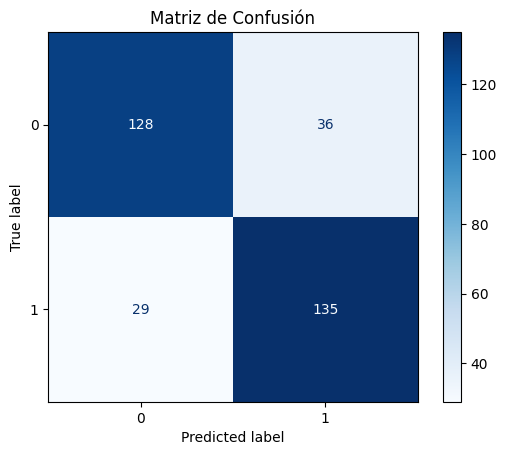

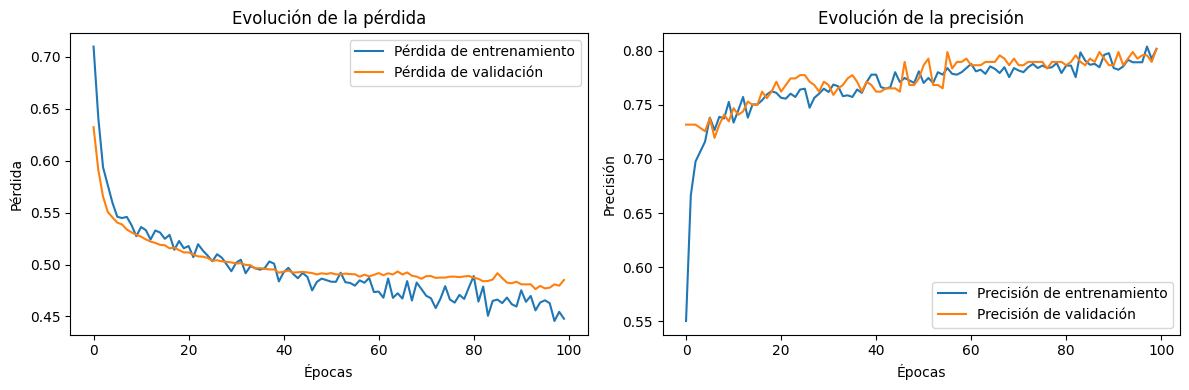

In [8]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Ruta al archivo CSV
file_path = r'C:\Users\USUARIO\Desktop\nuevo\BDFINAL.csv'

# Cargar el archivo CSV en un DataFrame, usando low_memory=False
df = pd.read_csv(file_path, low_memory=False)

# Preprocesamiento
class PreparacionBHE:
    def __init__(self, df):
        self.df = df
        self.scaler = StandardScaler()

    def seleccionar_descriptores_relevantes(self, k=20):
        # Seleccionar descriptores potencialmente relevantes para la BHE
        descriptores_potenciales = [ 
            'LogP', 'nHBAcc', 'nHBDon', 'MW', 'TopoPSA', 'nRotB', 'LabuteASA'
        ]
        
        # Asegurarse de que todos los descriptores estén presentes en el DataFrame
        descriptores_disponibles = [d for d in descriptores_potenciales if d in self.df.columns]
        
        # Usar SelectKBest para elegir los k mejores descriptores
        X = self.df[descriptores_disponibles].dropna()  # Filtrar descriptores no nulos
        y = self.df['logBB'].dropna()  # Omitir nulos en logBB
        
        # Asegurarse de que X esté alineado con y
        X = X.loc[y.index]
        
        selector = SelectKBest(score_func=f_classif, k=k)
        selector.fit(X, y)
        
        descriptores_seleccionados = X.columns[selector.get_support()].tolist()
        
        return descriptores_seleccionados
    
    def preparar_datos_modelo(self):
        descriptores = self.seleccionar_descriptores_relevantes(k=10)
        
        # Usar los descriptores seleccionados como variables predictoras
        X = self.df[descriptores].dropna()  # Omitir nulos en los descriptores
        y = self.df['logBB'].dropna()  # Omitir nulos en la variable objetivo
        
        # Convertir logBB a clases binarias
        y = (y >= 0.5).astype(int)  # Umbral de 0.5 para atravesar la BHE
        
        # Asegurarse de que X esté alineado con y
        X = X.loc[y.index]
        
        # Escalar los datos
        X_scaled = self.scaler.fit_transform(X)
        
        # Aplicar SMOTE para balancear las clases
        smote = SMOTE(sampling_strategy='auto', random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
        
        # Dividir en conjuntos de entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
        
        return X_train, X_test, y_train, y_test, descriptores

    def entrenar_red_neuronal(self):
        X_train, X_test, y_train, y_test, descriptores = self.preparar_datos_modelo()
        
        # Definir la estructura de la red neuronal
        modelo = Sequential([
            Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
            Dropout(0.5),
            Dense(32, activation='relu'),
            Dropout(0.5),
            Dense(1, activation='sigmoid')  # Clasificación binaria
        ])
        
        # Compilar el modelo
        modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        
        # Entrenar el modelo
        historia = modelo.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
        
        # Evaluar el modelo
        y_pred = modelo.predict(X_test)
        y_pred_classes = (y_pred >= 0.5).astype(int)  # Umbral de 0.5
        
        # Métricas de evaluación
        print(classification_report(y_test, y_pred_classes))
        
        # Matriz de confusión
        cm = confusion_matrix(y_test, y_pred_classes)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
        disp.plot(cmap='Blues')
        plt.title('Matriz de Confusión')
        plt.show()
        
        return modelo, historia

# Crear una instancia de la clase
modelo_bhe = PreparacionBHE(df)

# Entrenar el modelo y obtener resultados
modelo, historia = modelo_bhe.entrenar_red_neuronal()

# Graficar la pérdida y la precisión a lo largo de las épocas
plt.figure(figsize=(12, 4))

# Gráfico de la pérdida
plt.subplot(1, 2, 1)
plt.plot(historia.history['loss'], label='Pérdida de entrenamiento')
plt.plot(historia.history['val_loss'], label='Pérdida de validación')
plt.title('Evolución de la pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Gráfico de la precisión
plt.subplot(1, 2, 2)
plt.plot(historia.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(historia.history['val_accuracy'], label='Precisión de validación')
plt.title('Evolución de la precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/50


c:\Users\USUARIO\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5266 - loss: 0.7481 - val_accuracy: 0.7012 - val_loss: 0.6127
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6870 - loss: 0.6156 - val_accuracy: 0.7256 - val_loss: 0.5754
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7094 - loss: 0.5814 - val_accuracy: 0.7073 - val_loss: 0.5539
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7417 - loss: 0.5492 - val_accuracy: 0.7104 - val_loss: 0.5430
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7365 - loss: 0.5485 - val_accuracy: 0.7134 - val_loss: 0.5363
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7189 - loss: 0.5402 - val_accuracy: 0.7226 - val_loss: 0.5321
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7537 - loss: 0.5407 - val_accuracy: 0.7378 - val_loss: 0.5288
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7361 - loss: 0.5265 - val_accuracy: 0.7409 - val_loss: 0.5265
Epo

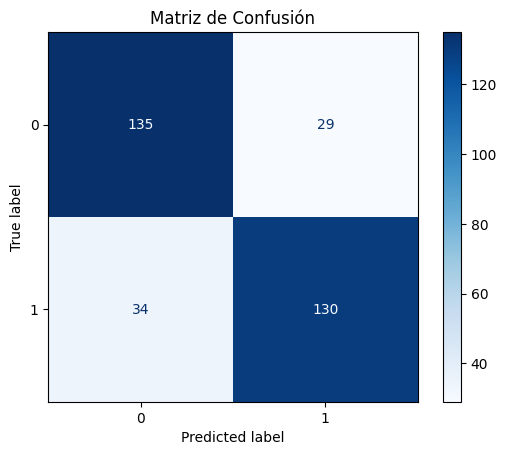

Número de moléculas que atraviesan la BHE: 159
Número de moléculas que NO atraviesan la BHE: 169


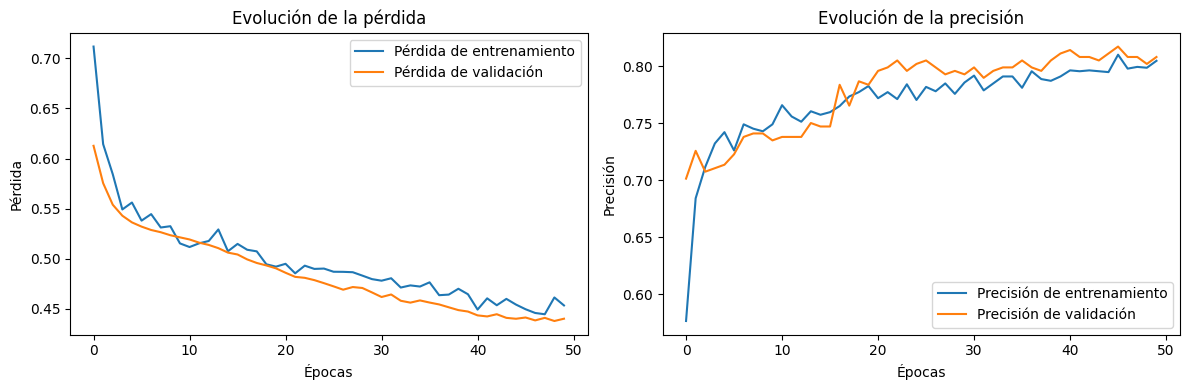

In [2]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# Ruta al archivo CSV
file_path = r'C:\Users\USUARIO\Desktop\nuevo\BDFINAL.csv'

df = pd.read_csv(file_path, low_memory=False)

# Preprocesamiento
class PreparacionBHE:
    def __init__(self, df):
        self.df = df
        self.scaler = StandardScaler()

    def seleccionar_descriptores_relevantes(self, k=20):
        # Seleccionar descriptores potencialmente relevantes para la BHE
        descriptores_potenciales = [
            'ECIndex', 'ATSC1c', 'NtCH', 'AATS0Z', 'SssssC', 'nHetero', 'Radius', 'ATS8i', 
            'LogP', 'nHBAcc', 'nHBDon', 'MW', 'TopoPSA', 'nRotB', 'LabuteASA'
        ]
        
        # Asegurarse de que todos los descriptores estén presentes en el DataFrame
        descriptores_disponibles = [d for d in descriptores_potenciales if d in self.df.columns]
        
        # Usar SelectKBest para elegir los k mejores descriptores
        X = self.df[descriptores_disponibles].dropna()  # Filtrar descriptores no nulos
        y = self.df['logBB'].dropna()  # Omitir nulos en logBB
        
        # Asegurarse de que X esté alineado con y
        X = X.loc[y.index]
        
        selector = SelectKBest(score_func=f_classif, k=k)
        selector.fit(X, y)
        
        descriptores_seleccionados = X.columns[selector.get_support()].tolist()
        
        return descriptores_seleccionados
    
    def preparar_datos_modelo(self):
        descriptores = self.seleccionar_descriptores_relevantes(k=10)
        
        # Usar los descriptores seleccionados como variables predictoras
        X = self.df[descriptores].dropna()  # Omitir nulos en los descriptores
        y = self.df['logBB'].dropna()  # Omitir nulos en la variable objetivo
        
        # Convertir logBB a clases binarias
        y = (y >= 0.5).astype(int)  # Umbral de 0.5 para atravesar la BHE
        
        # Asegurarse de que X esté alineado con y
        X = X.loc[y.index]
        
        # Escalar los datos
        X_scaled = self.scaler.fit_transform(X)
        
        # Aplicar SMOTE para balancear las clases
        smote = SMOTE(sampling_strategy='auto', random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
        
        # Dividir en conjuntos de entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
        
        return X_train, X_test, y_train, y_test, descriptores

    def entrenar_red_neuronal(self):
        X_train, X_test, y_train, y_test, descriptores = self.preparar_datos_modelo()
        
        # Definir la estructura de la red neuronal
        modelo = Sequential([
            Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
            Dropout(0.5),
            Dense(32, activation='relu'),
            Dropout(0.5),
            Dense(1, activation='sigmoid')  # Clasificación binaria
        ])
        
        # Compilar el modelo
        modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        
        # Entrenar el modelo
        historia = modelo.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
        
        # Evaluar el modelo
        y_pred = modelo.predict(X_test)
        y_pred_classes = (y_pred >= 0.5).astype(int)  # Umbral de 0.5
        
        # Mostrar reporte de clasificación
        print(classification_report(y_test, y_pred_classes))
        
        # Matriz de confusión
        cm = confusion_matrix(y_test, y_pred_classes)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
        disp.plot(cmap='Blues')
        plt.title('Matriz de Confusión')
        plt.show()
        
        # Contar cuántas moléculas atraviesan y cuántas no atraviesan la BHE
        num_atravesando = np.sum(y_pred_classes == 1)
        num_no_atravesando = np.sum(y_pred_classes == 0)
        
        print(f'Número de moléculas que atraviesan la BHE: {num_atravesando}')
        print(f'Número de moléculas que NO atraviesan la BHE: {num_no_atravesando}')
        
        return modelo, historia

# Crear una instancia de la clase
modelo_bhe = PreparacionBHE(df)

# Entrenar el modelo y obtener resultados
modelo, historia = modelo_bhe.entrenar_red_neuronal()

# Graficar la pérdida y la precisión a lo largo de las épocas
plt.figure(figsize=(12, 4))

# Gráfico de la pérdida
plt.subplot(1, 2, 1)
plt.plot(historia.history['loss'], label='Pérdida de entrenamiento')
plt.plot(historia.history['val_loss'], label='Pérdida de validación')
plt.title('Evolución de la pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Gráfico de la precisión
plt.subplot(1, 2, 2)
plt.plot(historia.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(historia.history['val_accuracy'], label='Precisión de validación')
plt.title('Evolución de la precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()
